## Module 1: Data Acquisition and Preprocessing:


Importing Required Modules

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

Setting The Figure's Paramtere To Use In Visualization

In [202]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(font='Times New Roman', font_scale=1.5)

# Set Seaborn rcParams
sns.set(rc={
    'font.family': 'Times New Roman',
    'font.size': 12,
    'font.style':'normal'
})

1. Data Acquisition:

- Loading the dataset into dataframe

In [203]:
originaldataframe = pd.read_json("electronics.json")
originaldataframe.head(5)

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


2. Data Cleaning:

- Replace all spaces with null values to clean the data. Drop rows with 30% missing values and column with 50% null values

In [204]:
originaldataframe.replace("", np.nan, inplace=True)
# Drop rows with more than 30% missing values
threshold_row = len(originaldataframe.columns) * 0.30
originaldataframe.dropna(thresh=threshold_row, axis=0, inplace=True)
# Drop columns with more than 50% missing values
threshold_col = len(originaldataframe) * 0.5
originaldataframe.dropna(thresh=threshold_col, axis=1, inplace=True)


- Replace the 'Hidden' Customer_ID with 'null' and then fill in the missing information

In [205]:
originaldataframe['Customer_ID'].replace("Hidden",np.nan,inplace=True)
originaldataframe['Customer_ID'].fillna("Unknwon",inplace=True)

- First, change the 'Hidden' age entries to 'null'. Next, convert the data type of the 'Age' column to float64. Finally, fill in the empty 'Age' values with the average (mean) age from the existing data.

In [206]:
originaldataframe['Age'].replace('Hidden', np.nan, inplace=True)
originaldataframe['Age'] = originaldataframe['Age'].astype(np.float64)
originaldataframe['Age'].fillna(originaldataframe.Age.mean(),inplace=True)

- Remove the address inconsistencies and Fill in the missing information 

In [207]:
originaldataframe['Address'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Address'] = originaldataframe['Address'].fillna(
    originaldataframe.groupby(['Address'])['Address'].transform('first'))
originaldataframe['Address'].fillna('Unknown',inplace=True)

originaldataframe['Address']= originaldataframe['Address'].str.upper().str.strip()
originaldataframe['Address']= originaldataframe['Address'].apply(lambda x : x.encode('ascii','ignore').decode('utf-8'))
originaldataframe['Address']= originaldataframe['Address'].str.replace('[^\w\s]','')
originaldataframe['Address']= originaldataframe['Address'].str.replace('\d+', '')
originaldataframe['Address']= originaldataframe['Address'].str.replace('\n','')

- Replace the 'Hidden' gender entries to 'null'. Then, fill in the missing 'Gender' values with 'Unknown'.

In [293]:
originaldataframe['Gender'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Gender'] = originaldataframe['Gender'].fillna(
originaldataframe.groupby('Address')['Gender'].transform('first'))
originaldataframe['Gender'].fillna('Unknown',inplace=True)

- Replace the 'Hidden' Income_level entries with 'null'. Then, fill in the missing 'Income_level' values with 'Unknown'.

In [209]:
originaldataframe['Income_Level'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Income_Level'] = originaldataframe['Income_Level'].fillna(
    originaldataframe.groupby('Address')['Income_Level'].transform('first'))
originaldataframe['Income_Level'].fillna('Unknown',inplace=True)

- Replace the 'Hidden' Transaction_ID entries with 'null'. Then, fill in the missing 'Transaction_ID' values with 'Unknown'.

In [210]:
originaldataframe['Transaction_ID'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Transaction_ID'] = originaldataframe['Transaction_ID'].fillna(
originaldataframe.groupby('Address')['Transaction_ID'].transform('first'))
originaldataframe['Transaction_ID'].fillna('Unknown',inplace=True)

- First, Replace the 'Hidden' Purchase_Date entries to 'null'. Next, convert the 'Purchase_Date' column data type to datetime. Finally, fill in the missing 'Purchase_Date' values using forward fill method.

In [211]:
originaldataframe['Purchase_Date'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Purchase_Date'] = pd.to_datetime(originaldataframe['Purchase_Date'])
originaldataframe = originaldataframe.sort_values(by=['Purchase_Date'])
originaldataframe['Purchase_Date'].ffill(inplace=True)

- Replace the 'Hidden' Product_ID entries with 'null'. Then, fill in the missing 'Product_ID' values with 'Unknown'.

In [212]:
originaldataframe['Product_ID'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Product_ID'].fillna('Unknown',inplace=True)

- Convert the Purchase_Category column data type to category.

In [213]:
originaldataframe['Product_Category'] = originaldataframe['Product_Category'].astype('category')

# originaldataframe['Product_Category'].replace('Hidden',np.nan,inplace=True)
# print(originaldataframe['Product_Category'].isna().sum())
# originaldataframe['Product_Category'].fillna(
#         originaldataframe.groupby(['Product_ID','Brand'],observed=True)['Product_Category'].transform('first'))
# print(originaldataframe['Product_Category'].isna().sum())

- Replace the 'Hidden' Brand entries with 'null'. Then, fill in the missing 'Brand' values with 'Unknown'.

In [214]:
originaldataframe['Brand'].replace('Hidden', np.nan, inplace=True)
originaldataframe['Brand'] = originaldataframe['Brand'].fillna(
    originaldataframe.groupby(['Product_ID', 'Product_Category'],observed=True)['Brand'].transform('first'))
originaldataframe['Brand'].fillna('Unknown', inplace=True)


- First, change the 'Hidden' Purchase_Amount entries to 'null'. Next, convert the 'Purchase_Amount' column data type to float64. Finally, fill in the missing 'Purchase_Amount' values with the average (mean) of the existing column data.

In [215]:
originaldataframe['Purchase_Amount'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Purchase_Amount'] = originaldataframe['Purchase_Amount'].fillna(
    originaldataframe.groupby(['Product_ID','Product_Category','Brand'],observed=True)['Purchase_Amount'].transform('first'))
originaldataframe['Purchase_Amount'] = originaldataframe['Purchase_Amount'].astype(np.float64)
originaldataframe['Purchase_Amount'].fillna(originaldataframe['Purchase_Amount'].mean(),inplace=True)

- First, change the 'Hidden' Average_Spending_Per_Purchase entries to 'null'. Next, convert the 'Average_Spending_Per_Purchase' column data type to float64. Finally, fill in the missing 'Average_Spending_Per_Purchase' values with the average (mean) of the existing column data.

In [216]:
originaldataframe['Average_Spending_Per_Purchase'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Average_Spending_Per_Purchase'] = originaldataframe['Average_Spending_Per_Purchase'].fillna(
    originaldataframe.groupby(['Product_ID','Product_Category','Brand'],observed=True)['Average_Spending_Per_Purchase'].transform('first'))
originaldataframe['Average_Spending_Per_Purchase'] = originaldataframe['Average_Spending_Per_Purchase'].astype(np.float64)
originaldataframe['Average_Spending_Per_Purchase'].fillna(
    originaldataframe['Average_Spending_Per_Purchase'].mean(),inplace=True)

- First, change the 'Hidden' Purchase_Frequency_Per_Month entries to 'null'. Next, convert the 'Purchase_Frequency_Per_Month' column data type to float64. Finally, fill in the missing 'Purchase_Frequency_Per_Month' values with the average (mean) of the existing column data.

In [217]:
originaldataframe['Purchase_Frequency_Per_Month'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Purchase_Frequency_Per_Month'] = originaldataframe['Purchase_Frequency_Per_Month'].fillna(
    originaldataframe.groupby('Address')['Purchase_Frequency_Per_Month'].transform('first'))
originaldataframe['Purchase_Frequency_Per_Month'] = originaldataframe['Purchase_Frequency_Per_Month'].astype(np.float64)
originaldataframe['Purchase_Frequency_Per_Month'].fillna(
    originaldataframe['Purchase_Frequency_Per_Month'].mean(),inplace=True)
originaldataframe['Purchase_Frequency_Per_Month'] = originaldataframe['Purchase_Frequency_Per_Month'].round(1)

- First, change the 'Hidden' Brand_Affinity_Score entries to 'null'. Next, convert the 'Brand_Affinity_Score' column data type to float64. Finally, fill in the missing 'Brand_Affinity_Score' values with the average (mean) of the existing column data.

In [218]:
originaldataframe['Brand_Affinity_Score'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Brand_Affinity_Score'] = originaldataframe['Brand_Affinity_Score'].fillna(
    originaldataframe.groupby(['Brand','Product_Category','Product_ID'],observed=True)['Brand_Affinity_Score'].transform('first'))
originaldataframe['Brand_Affinity_Score'] = originaldataframe['Brand_Affinity_Score'].astype(np.float64)
originaldataframe['Brand_Affinity_Score'].fillna(originaldataframe['Brand_Affinity_Score'].mean(),inplace=True)
originaldataframe['Brand_Affinity_Score'] = originaldataframe['Brand_Affinity_Score'].round(1)


- Replace the 'Hidden' values with 'null. Then, fill in the missing values with 'Unknown'.

In [219]:
originaldataframe['Product_Category_Preferences'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Product_Category_Preferences'] = originaldataframe['Product_Category_Preferences'].fillna(
    originaldataframe.groupby(['Brand','Product_Category','Purchase_Amount','Product_ID'],observed=True)
    ['Product_Category_Preferences'].transform('first'))
originaldataframe['Product_Category_Preferences'].fillna('Unknown', inplace=True)

- First, replace the 'Hidden' values of month with 'null'. Next, convert the 'Month' column data type to the datetime month only, Finally sort the values by month and fill in the missing month values with the forward fill method.

In [220]:
originaldataframe['Month'].replace('Hidden',np.nan,inplace=True)
originaldataframe['Month'] = pd.to_datetime(originaldataframe['Month'], format='%m').dt.month
originaldataframe = originaldataframe.sort_values(by=['Month'])
originaldataframe.ffill(inplace=True)

- First, replace the 'Hidden' values of year with 'null'. Next, convert the 'Year' column data type to the datetime year only, Finally sort the values by year and fill in the missing year values with the forward fill method.

In [221]:
originaldataframe['Year'].replace('Hidden', np.nan, inplace=True)
originaldataframe['Year'] = pd.to_datetime(originaldataframe['Year'], format='%Y').dt.year
originaldataframe = originaldataframe.sort_values(by=['Year'])
originaldataframe['Year'].ffill(inplace=True)

- Replace the 'Hidden' values of season with null. Then, make the bin to fill in the season missing values depends on the month.

In [222]:
originaldataframe['Season'].replace('Hidden', np.nan, inplace=True)
bins = [0, 3, 6, 9, 12]
labels = ['Winter', 'Spring', 'Summer', 'Fall']
originaldataframe['Season'] = pd.cut(originaldataframe['Purchase_Date'].dt.month, bins=bins, labels=labels, include_lowest=True)

- Analyze Outliers and dropping outliers.
  - Purchase Date


In [223]:
# plt.figure(figsize=(12,5))
# sns.set_style('whitegrid')
# sns.boxplot(data=originaldataframe,x='Purchase_Amount',width=0.20,palette='viridis',hue=0)
# plt.title('Box Plot of Purchase Amount to Identify Outliers')

Q1 = originaldataframe['Purchase_Amount'].quantile(0.25)
Q3 = originaldataframe['Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1

# Upper and Lower Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = originaldataframe[(originaldataframe['Purchase_Amount'] >= lower_bound) & 
    (originaldataframe['Purchase_Amount'] <= upper_bound)]

   -  Average_Spending_Per_Purchase

In [224]:
Q1 = originaldataframe['Average_Spending_Per_Purchase'].quantile(0.25)
Q3 = originaldataframe['Average_Spending_Per_Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Upper and Lower Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = originaldataframe[(originaldataframe['Average_Spending_Per_Purchase'] >= lower_bound) & 
    (originaldataframe['Average_Spending_Per_Purchase'] <= upper_bound)]

- Purchase_Frequency_Per_Month

In [225]:

Q1 = originaldataframe['Purchase_Frequency_Per_Month'].quantile(0.25)
Q3 = originaldataframe['Purchase_Frequency_Per_Month'].quantile(0.75)
IQR = Q3 - Q1

# Upper and Lower Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = originaldataframe[(originaldataframe['Purchase_Frequency_Per_Month'] >= lower_bound) & 
    (originaldataframe['Purchase_Frequency_Per_Month'] <= upper_bound)]

#### 1.3 Data Transformation:

- Average spending per purchase
Purchase frequency per month
Brand affinity score (based on product brand preferences)
Product category preferences (e.g., TVs, smartphones, laptops) contains (Low,Medium,high).
These columns are already present in the data.


- Standardize And normalize the numeric data to use in the Machine Learning Algorithms

In [226]:
numeric_columns = ["Purchase_Amount", "Average_Spending_Per_Purchase", "Purchase_Frequency_Per_Month", "Brand_Affinity_Score"]
X=originaldataframe[numeric_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca_scaled = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca_scaled, columns=['PC1', 'PC2'])
X_pca_df

,PC1,PC2
0,0.591638,-0.155707
1,0.559644,-0.864653
2,0.412554,1.331168
3,0.564692,-1.610623
4,-0.829881,-0.139643
...,...,...
995,-1.271759,0.493026
996,0.116987,1.308553
997,0.449692,-1.523816
998,-1.974780,-0.469897


## Module 2:  Exploratory Data Analysis(EDA):


#### 1. Univariate Analysis:

- Customer's Age Distribution
    - Age Distribution Histogram to check the distribution of Age data 

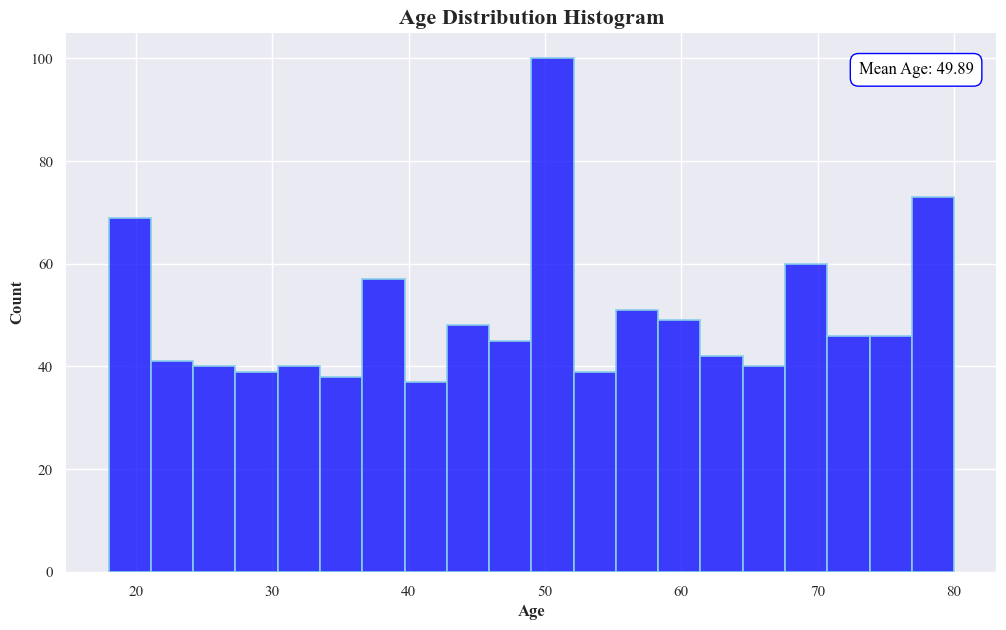

In [294]:
sns.histplot(data=originaldataframe,x='Age',bins=20,
             color='blue',
             edgecolor='skyblue', linewidth=1.2)

# Show the mean Age in the box
mean_age = originaldataframe['Age'].mean()
plt.text(73, 97, f'Mean Age: {mean_age:.2f}', color='black', fontsize=12, 
         bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Age Distribution Histogram',fontsize=16,fontweight='bold')
sns.despine(left=True)
sns.despine(left=True, bottom=True)

plt.show()


- The histogram is showing the distribution of ages. There are three prominent age groups, one around 20 years old,second around 80 and another around 50 years old. The mean age of the entire dataset is 49.89 years.
- A smooth line graph overlaid on the histogram indicates the trend of age distribution, showing valleys and peaks corresponding to the bars of the histogram.
    - Conclusion:
    We can interperate that the most customers are of age 20,50 and 80.

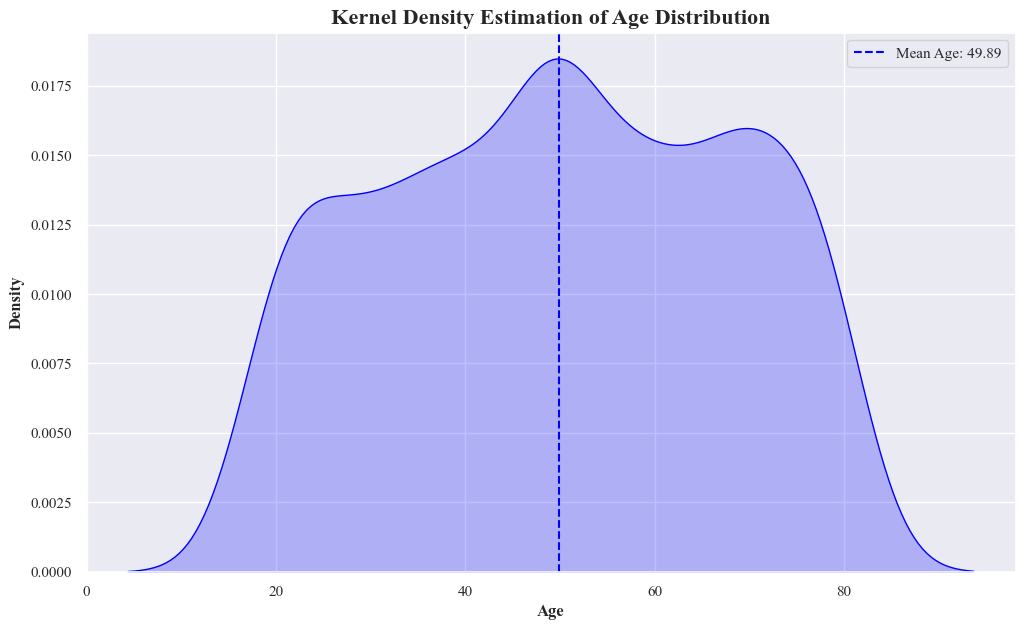

In [228]:
sns.kdeplot(data=originaldataframe,x='Age',fill=True,color='blue',edgecolor='blue')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Density',fontweight='bold')
plt.title('Kernel Density Estimation of Age Distribution',fontsize=16,fontweight='bold')

mean_age = originaldataframe['Age'].mean()
plt.axvline(mean_age, color='blue', linestyle='--', label=f'Mean Age: {mean_age:.2f}')
plt.legend()
plt.show()

- This graph represents a Kernel Density Estimation of Age Distribution. It shows the probability density of different ages.
- A smooth, symmetrical curve represents the age distribution, peaking at around the mean age.

- Detecting Outliers in Age 

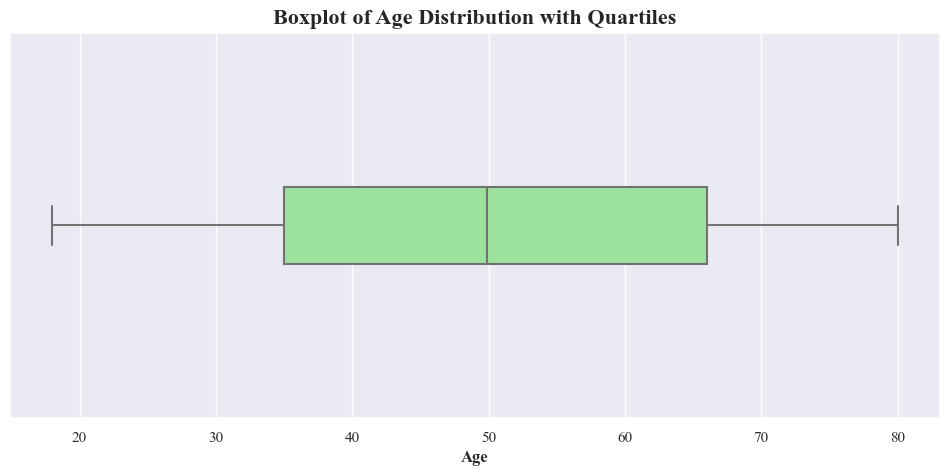

In [229]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=originaldataframe, x='Age', width=0.2, color='lightgreen',linewidth=1.5, fliersize=5)
plt.xlabel('Age',fontweight='bold')
plt.title('Boxplot of Age Distribution with Quartiles',fontsize=16,fontweight='bold')
plt.show()


- The boxplot shows that there's no outliers in the data

> Descriptive Statistics

In [230]:
age_descriptive_stats = originaldataframe['Age'].describe()
print(age_descriptive_stats)

count    1000.000000
mean       49.885417
std        18.108487
min        18.000000
25%        35.000000
50%        49.885417
75%        66.000000
max        80.000000
Name: Age, dtype: float64


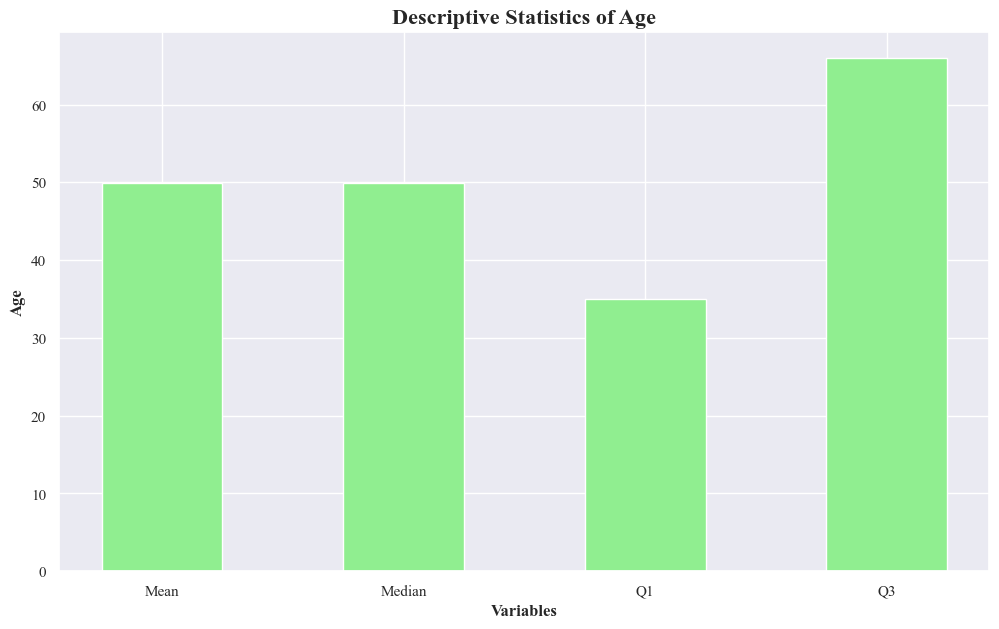

In [231]:
mean_age = originaldataframe['Age'].mean()
median_age = originaldataframe['Age'].median()
q1 = originaldataframe['Age'].quantile(0.25)
q3 = originaldataframe['Age'].quantile(0.75)

plt.bar(['Mean', 'Median', 'Q1', 'Q3'], [mean_age, median_age, q1, q3], color=['lightgreen'], width=0.5)
plt.xlabel("Variables",fontweight='bold')
plt.ylabel('Age',fontweight='bold')
plt.title('Descriptive Statistics of Age',fontsize=16,fontweight='bold')
plt.show()

- The graph represents the descriptive statistics of age, including the mean, median, first quartile (Q1), and third quartile (Q3). 
- The first quartile indicates that 25% of the customer is below 25 age. The third quartile indicates that 75% of the customer is below 60 age.
- Mean and Median bars are almost equal in height

*Purchase Amount*
- Purchase Amount Distribution Histogram to check the distribution of Purchase Amount data 

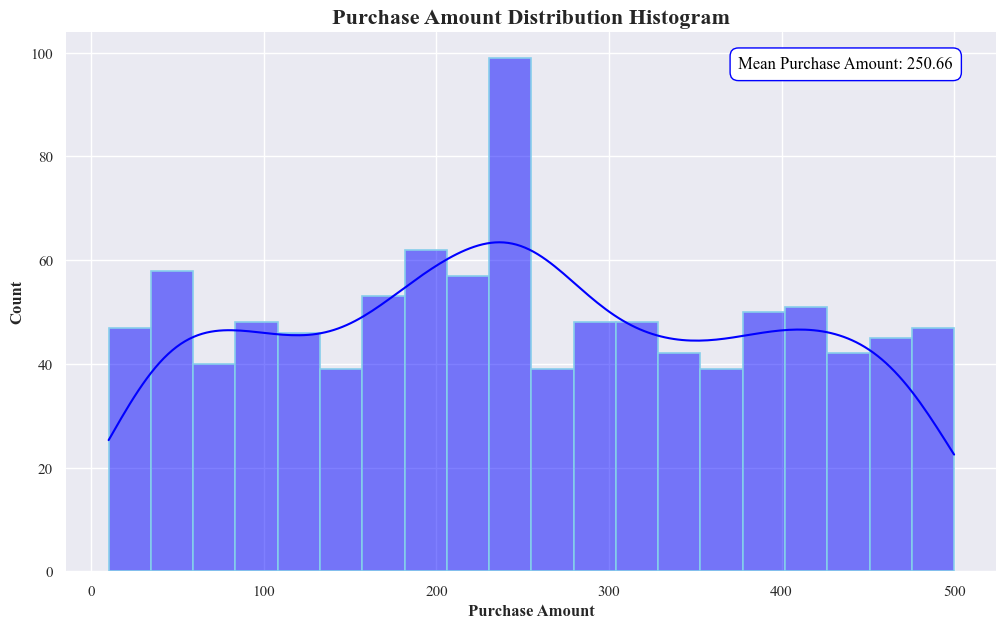

In [232]:
sns.histplot(data=originaldataframe,x='Purchase_Amount',bins=20,
             color='blue',kde=True,
             edgecolor='skyblue', linewidth=1.2)

# Show the mean Purchase Amount in the box
mean_purchase_amount = originaldataframe['Purchase_Amount'].mean()
plt.text(375, 97, f'Mean Purchase Amount: {mean_purchase_amount :.2f}', color='black', fontsize=12, 
         bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('Purchase Amount',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Purchase Amount Distribution Histogram',fontsize=16,fontweight='bold')
sns.despine(left=True)
sns.despine(left=True, bottom=True)
plt.show()

- The graph represents the descriptive statistics of purchase amounts.
- This histogram showing the distribution of purchase amounts. The most purchases are clustered around 250, as indicated by the peak in the histogram. The mean purchase amount, as noted on the graph, is 250.66.

*Kernel Density Estimation plot*

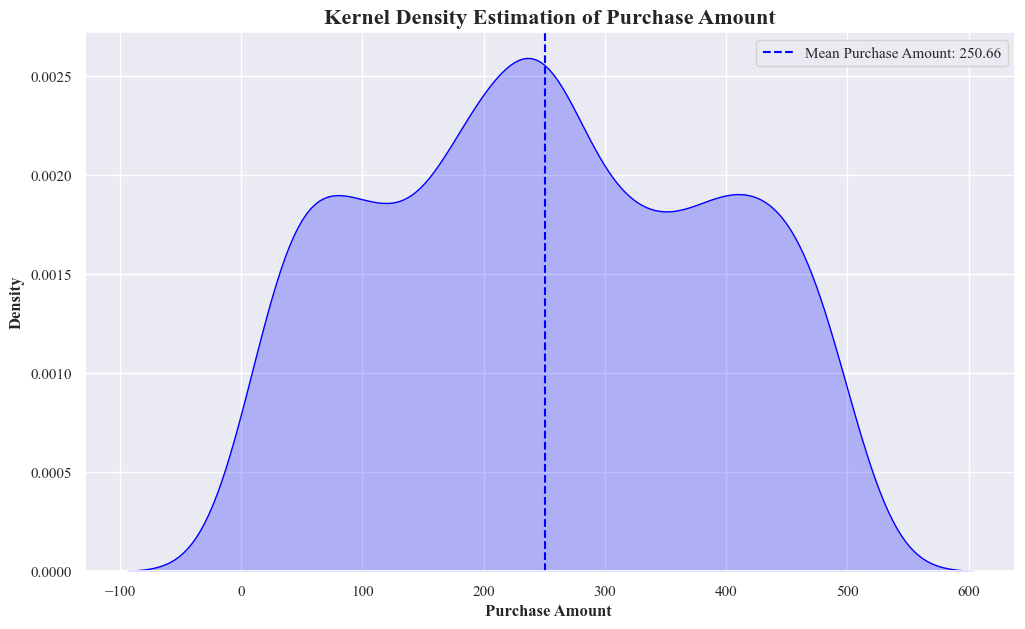

In [233]:
sns.kdeplot(data=originaldataframe,x='Purchase_Amount',fill=True,color='blue',edgecolor='blue')
plt.xlabel('Purchase Amount ',fontweight='bold')
plt.ylabel('Density',fontweight='bold')
plt.title('Kernel Density Estimation of Purchase Amount',fontsize=16,fontweight='bold')

mean_purchase_amount = originaldataframe['Purchase_Amount'].mean()
plt.axvline(mean_purchase_amount, color='blue', linestyle='--', label=f'Mean Purchase Amount: {mean_purchase_amount :.2f}')
plt.legend()
plt.show()

- This is a Kernel Density Estimation of Purchase Amount.
- It shows the probability density of different purchase amounts. The mean purchase amount is **250.66**.

*Box plot of Purchase Amount for detecing outliers in the data*

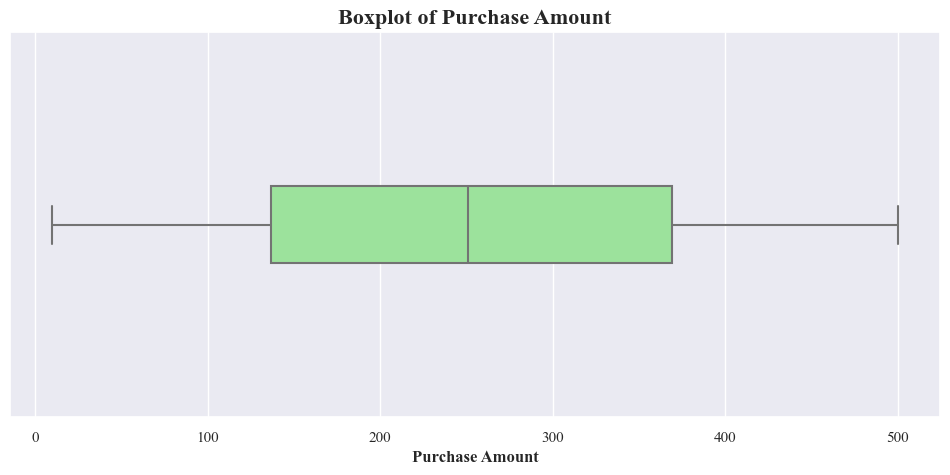

In [234]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=originaldataframe, x='Purchase_Amount', width=0.2, color='lightgreen',linewidth=1.5, fliersize=5)
plt.xlabel('Purchase Amount',fontweight='bold')
plt.title('Boxplot of Purchase Amount',fontsize=16,fontweight='bold')
plt.show()

- There's not outliers in the purchashe amount as well

*Descriptive Statistics for Purchase Amount*

In [235]:
purchase_amount_descriptive_stats = originaldataframe['Purchase_Amount'].describe()
print(purchase_amount_descriptive_stats)


count    1000.000000
mean      250.656513
std       137.517496
min        10.000000
25%       137.000000
50%       250.656513
75%       369.000000
max       500.000000
Name: Purchase_Amount, dtype: float64


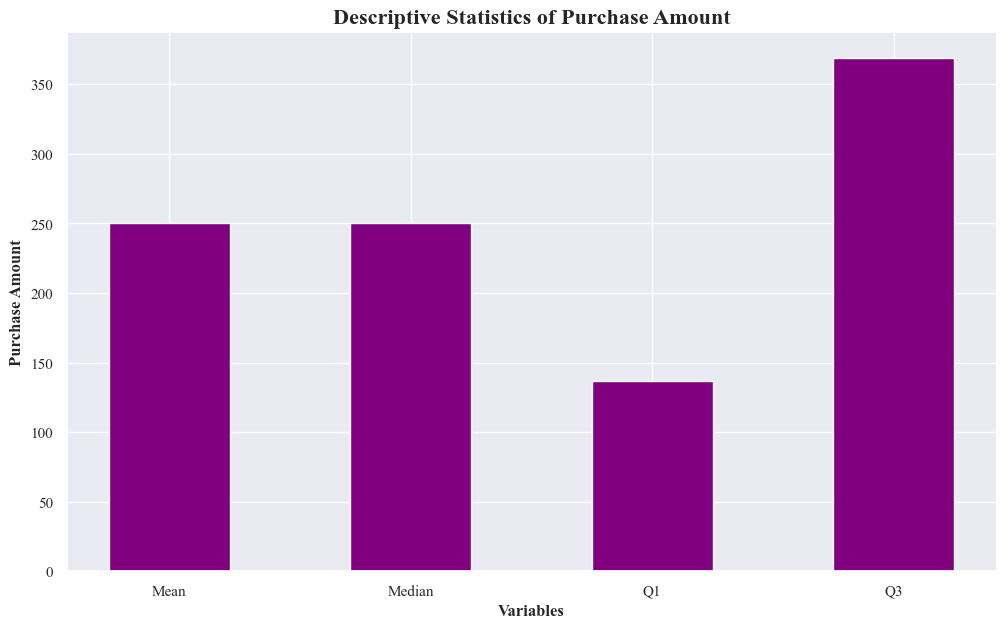

In [236]:
mean_Purchase_Amount = originaldataframe['Purchase_Amount'].mean()
median_Purchase_Amount = originaldataframe['Purchase_Amount'].median()
q1 = originaldataframe['Purchase_Amount'].quantile(0.25)
q3 = originaldataframe['Purchase_Amount'].quantile(0.75)

plt.bar(['Mean', 'Median', 'Q1', 'Q3'], [mean_Purchase_Amount, median_Purchase_Amount, q1, q3], color=['purple'], width=0.5)
plt.xlabel('Variables',fontweight='bold')
plt.ylabel('Purchase Amount',fontweight='bold')
plt.title('Descriptive Statistics of Purchase Amount',fontsize=16,fontweight='bold')
plt.show()

- It shows descriptive statistics of purchase amounts, across different variables.
- It includes measures of central tendency (mean and median) and spread (quartiles Q1 and Q3).
- The mean purchase amount is generally higher than the median, suggesting a potential right-skewed distribution.

*Average Spending Per Purchase*

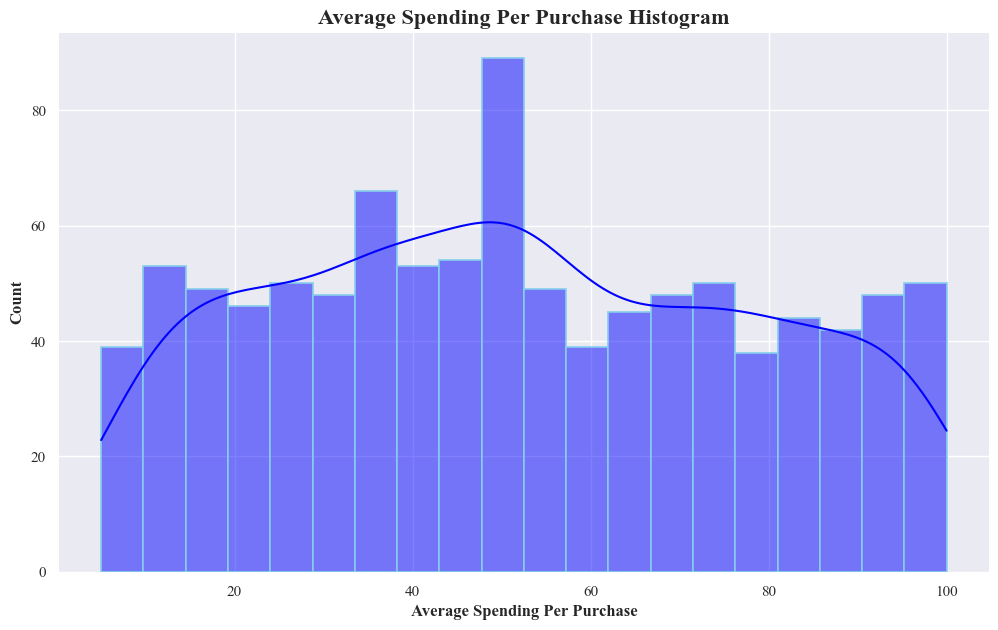

In [237]:
sns.histplot(data=originaldataframe,x='Average_Spending_Per_Purchase',bins=20,
             color='blue',kde=True,
             edgecolor='skyblue', linewidth=1.2)


plt.xlabel('Average Spending Per Purchase',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Average Spending Per Purchase Histogram',fontsize=16,fontweight='bold')
sns.despine(left=True)
sns.despine(left=True, bottom=True)

plt.show()

- The histogram is showing the distribution of average spending per purchase.
- The most common range of spending is between $20 and $40, with a peak of around 80 purchases.
- There's a gradual decline in frequency as spending increases, with fewer purchases above $60.

*Box Plot For Average Spending Per Purchase To Identify Outliers*

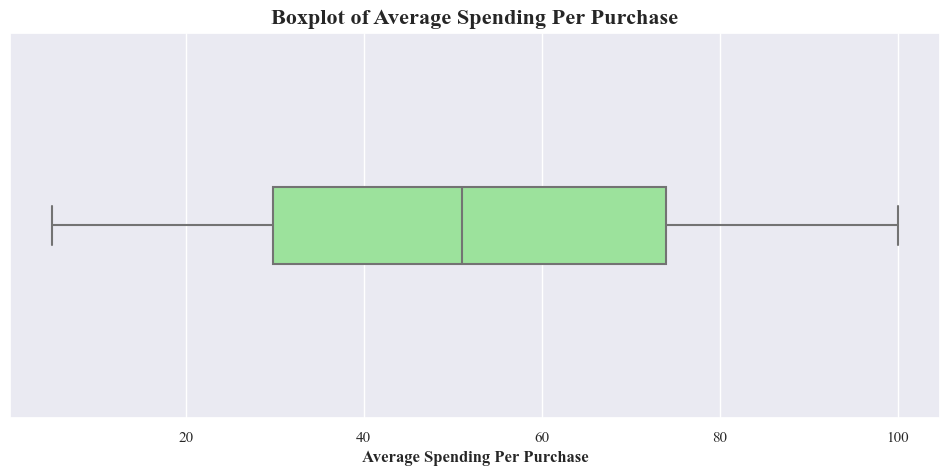

In [238]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=originaldataframe, x='Average_Spending_Per_Purchase', width=0.2, color='lightgreen',linewidth=1.5, fliersize=5)
plt.xlabel('Average Spending Per Purchase',fontweight='bold')
plt.title('Boxplot of Average Spending Per Purchase',fontsize=16,fontweight='bold')
plt.show()

- Above boxplot shows that there's not outliuers among Average Spending Per Purchase

*Descriptive Statistics for Average Spending Per Purchase*

In [239]:
avg_spending_per_purchase_descriptive_stats = originaldataframe['Average_Spending_Per_Purchase'].describe()
print(avg_spending_per_purchase_descriptive_stats)


count    1000.000000
mean       51.606846
std        26.617447
min         5.000000
25%        29.750000
50%        51.000000
75%        74.000000
max       100.000000
Name: Average_Spending_Per_Purchase, dtype: float64


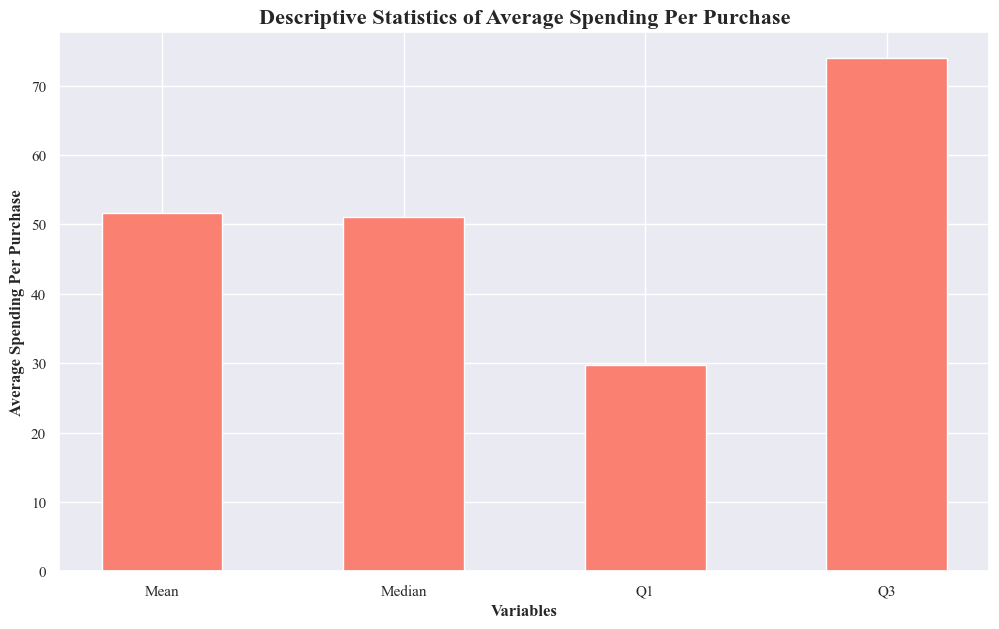

In [240]:
mean_Average_Spending_Per_Purchase = originaldataframe['Average_Spending_Per_Purchase'].mean()
median_Average_Spending_Per_Purchase = originaldataframe['Average_Spending_Per_Purchase'].median()
q1 = originaldataframe['Average_Spending_Per_Purchase'].quantile(0.25)
q3 = originaldataframe['Average_Spending_Per_Purchase'].quantile(0.75)

plt.bar(['Mean', 'Median', 'Q1', 'Q3'], [mean_Average_Spending_Per_Purchase, median_Average_Spending_Per_Purchase, q1, q3], color=['salmon'], width=0.5)
plt.xlabel('Variables',fontweight='bold')
plt.ylabel('Average Spending Per Purchase',fontweight='bold')
plt.title('Descriptive Statistics of Average Spending Per Purchase',fontsize=16,fontweight='bold')
plt.show()

- The average spending per purchase is likely right-skewed, with a few higher-value purchases influencing the mean.
- There's a moderate amount of variability in spending amounts, with 50% of purchases falling within the range of Q1 to Q3.

*Purchase Frequency Per Month*
- Purchase Frequency Per Month Histogram

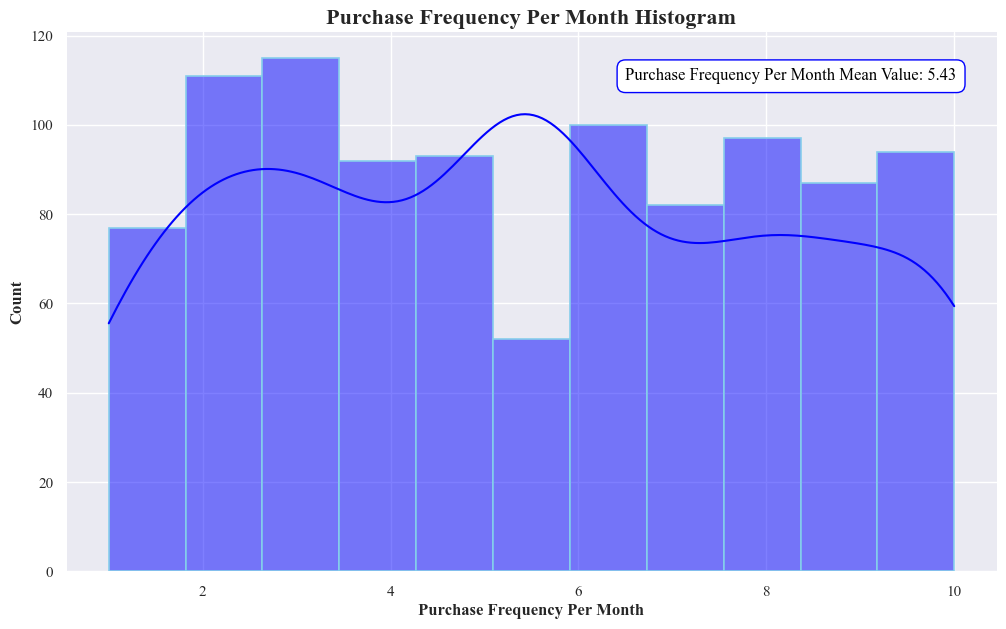

In [241]:
sns.histplot(data=originaldataframe,x='Purchase_Frequency_Per_Month',bins=11,
             color='blue',kde=True,
             edgecolor='skyblue', linewidth=1.2)

# Show the mean Purchase Amount in the box
mean_purchase_amount = originaldataframe['Purchase_Frequency_Per_Month'].mean()
plt.text(6.5, 110, f'Purchase Frequency Per Month Mean Value: {mean_purchase_amount :.2f}', color='black', fontsize=12, 
         bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.xlabel('Purchase Frequency Per Month',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Purchase Frequency Per Month Histogram',fontsize=16,fontweight='bold')
sns.despine(left=True)
sns.despine(left=True, bottom=True)

plt.show()

1. *Distribution of Purchase Frequencies:*
   - The distribution is *skewed to the right*, with a higher concentration of frequencies towards the lower end of the range (6-8 purchases per month).
   - The peak occurs in the bin representing 6-8 purchases per month, with a count of approximately 120.
   - The frequency counts gradually decrease as the purchase frequency increases.

2. *Average Purchase Frequency:*
   - The mean purchase frequency is *5.43 purchases per month*, indicated by the horizontal line.
   - This suggests that, on average, customers purchase the product around 5-6 times per month.

3. *Most Common Purchase Frequency:*
   - The most common purchase frequency range is *6-8 purchases per month*, as this bin has the highest count.

The graph indicates that the majority of customers purchase the product 6-8 times per month, with an average frequency of around 5.43 times per month. 

- Box Plot For Purchase Frequency Per Month To Identify Outliers

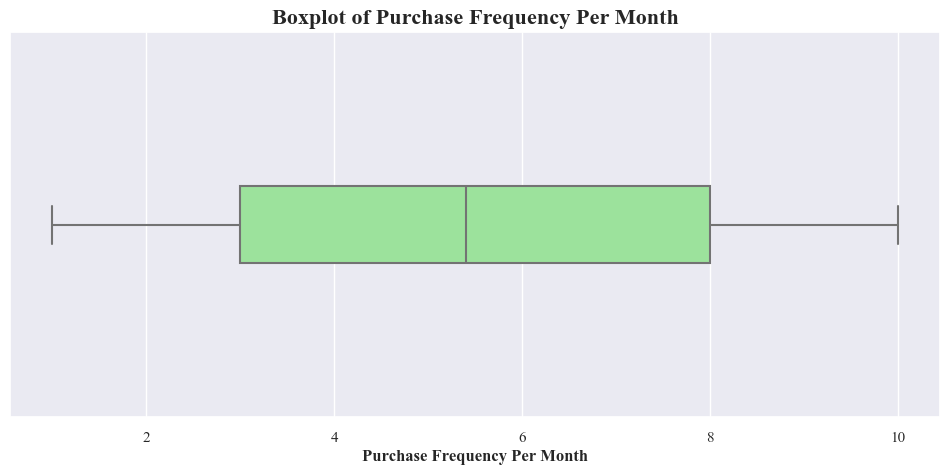

In [242]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=originaldataframe, x='Purchase_Frequency_Per_Month', width=0.2, color='lightgreen',linewidth=1.5, fliersize=5)
plt.xlabel('Purchase Frequency Per Month',fontweight='bold')
plt.title('Boxplot of Purchase Frequency Per Month',fontsize=16,fontweight='bold')
plt.show()

- Above boxplot shows that there's not outliuers among Purchase Freguency Per Month

*Descriptive Statistics for Purchase Frequency Per Month*

In [243]:
purchase_frequency_per_month_stats = originaldataframe['Purchase_Frequency_Per_Month'].describe()
print(purchase_frequency_per_month_stats)


count    1000.000000
mean        5.430800
std         2.767018
min         1.000000
25%         3.000000
50%         5.400000
75%         8.000000
max        10.000000
Name: Purchase_Frequency_Per_Month, dtype: float64


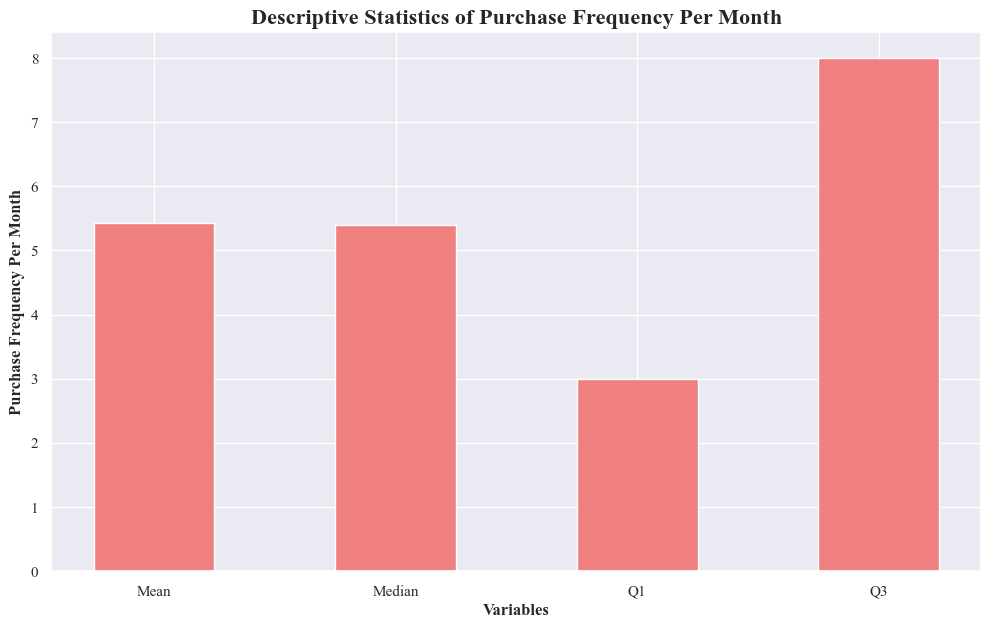

In [244]:
mean_puchase_frequency = originaldataframe['Purchase_Frequency_Per_Month'].mean()
median_puchase_frequency = originaldataframe['Purchase_Frequency_Per_Month'].median()
q1 = originaldataframe['Purchase_Frequency_Per_Month'].quantile(0.25)
q3 = originaldataframe['Purchase_Frequency_Per_Month'].quantile(0.75)

plt.bar(['Mean', 'Median', 'Q1', 'Q3'], [mean_puchase_frequency, median_puchase_frequency, q1, q3], color=['lightcoral'], width=0.5)
plt.xlabel('Variables',fontweight='bold')
plt.ylabel('Purchase Frequency Per Month',fontweight='bold')
plt.title('Descriptive Statistics of Purchase Frequency Per Month',fontsize=16,fontweight='bold')
plt.show()

- The highest number of purchases occurred in August
- The lowest number of purchases occurred in march.
- There's a moderate amount of variability in purchase frequency across the months.

#### 2. Bivariate Analysis:

-  Purchase Amount vs. Income Level
    - Scatter Plot of Purchase Amount vs. Income Level

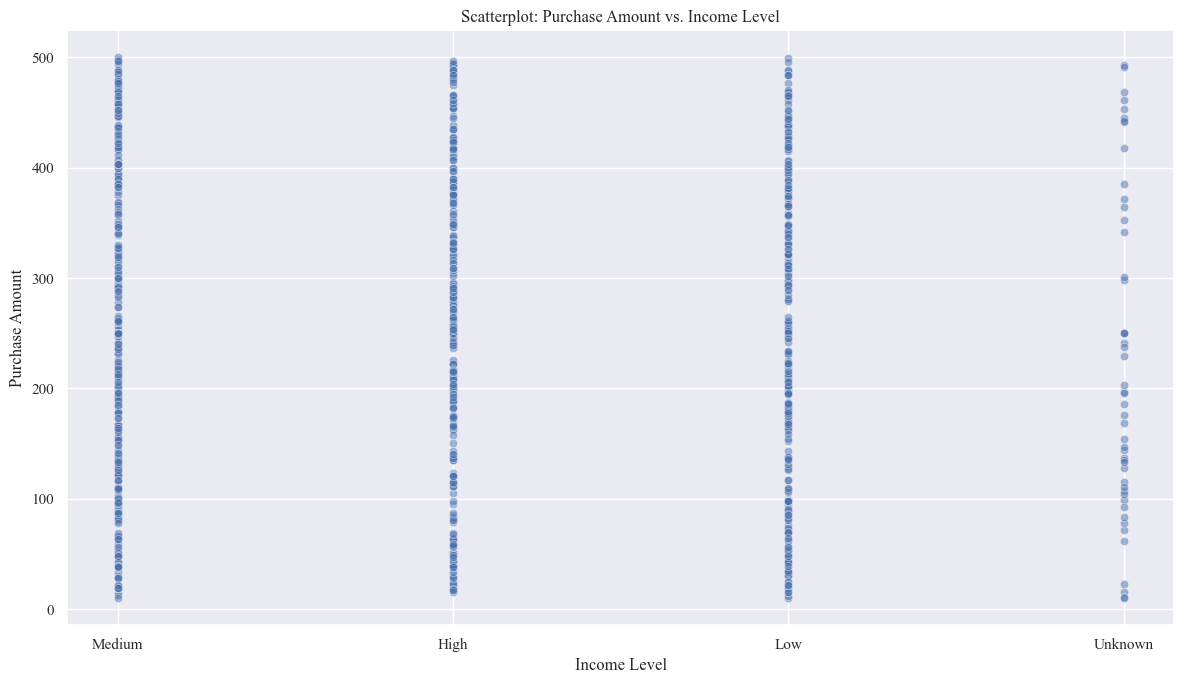

In [245]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Income_Level', y='Purchase_Amount', data=originaldataframe, alpha=0.5)
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.title('Scatterplot: Purchase Amount vs. Income Level')
plt.tight_layout()
plt.show()


- This shows that income level is a factor that influences purchase amount. People with higher incomes tend to spend more on average.
- The relationship isn't perfectly linear, suggesting that other factors beyond income also influence purchase decisions.
- There's a range of purchase amounts within each income level category, indicating that income alone doesn't determine how much someone spends.
- The presence of an "Unknown" income category suggests that there might be some missing data or uncertainty in the income information for some individuals.

*Heat Map Purchase Amount vs. Income Level*

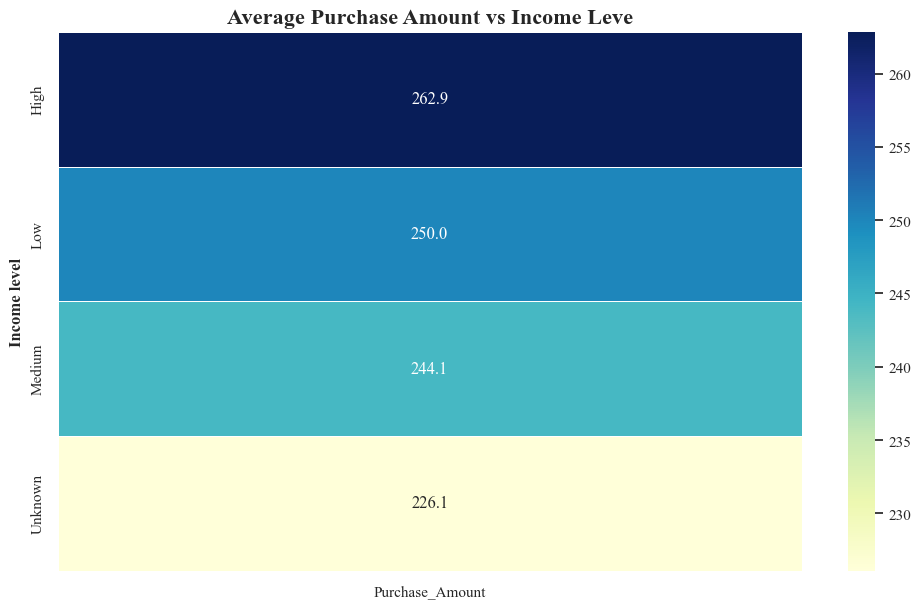

In [246]:
pivot_table = originaldataframe.pivot_table(values='Purchase_Amount', index='Income_Level', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.ylabel('Income level',fontweight='bold')
plt.title('Average Purchase Amount vs Income Leve',fontsize=16,fontweight='bold')
plt.show()

- The heatmap shows a positive relationship between income level and average purchase amount. Higher income levels generally correspond to higher average purchase amounts.
- The average purchase amounts increase from $230 for the "Unknown" income level to $262.9 for the "High" income level.

*Stem Chart to show the mean vlaues of Purchase Amount according to the groups of Income Level*

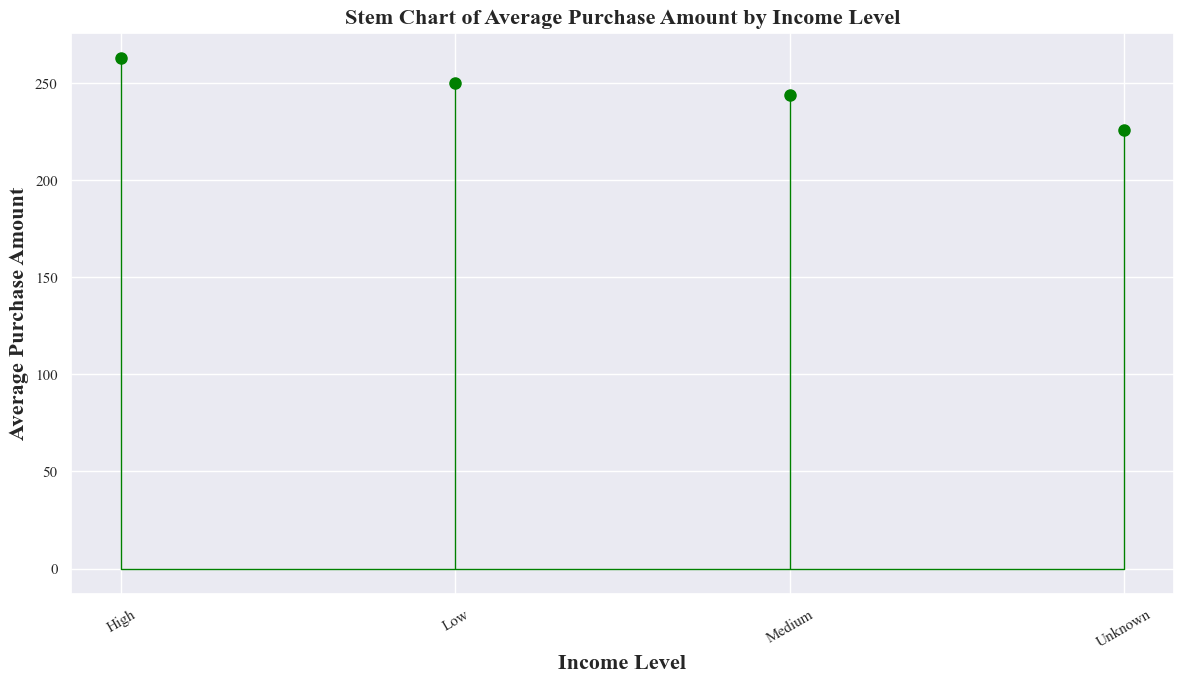

In [247]:
mean_values = pivot_table.values.flatten()
income_levels = pivot_table.index.tolist()

markerline, stemlines, baseline = plt.stem(mean_values, markerfmt='o', linefmt='-')
plt.setp(markerline, color='green', markersize=8) 
plt.setp(stemlines, color='green', linewidth=1)  
plt.setp(baseline, color='green', linewidth=1)  

plt.xticks(ticks=range(len(mean_values)), labels=income_levels, rotation=30)
plt.xlabel('Income Level', fontweight='bold', fontsize=16)
plt.ylabel('Average Purchase Amount', fontweight='bold', fontsize=16)
plt.title('Stem Chart of Average Purchase Amount by Income Level', fontsize=16, fontweight='bold')
plt.tight_layout()

plt.show()


- The stem plot shows the positive relationship between income level and average purchase amount. Higher income levels tend to correspond with higher average purchases.

*Pivot Table to show the Average, Standard Deviation, Max and Min of Income Level Groups*

In [248]:
income_level_purchase_amount_pivot_table = originaldataframe.pivot_table(values='Purchase_Amount',index='Income_Level',aggfunc=['mean','std','max','min'])
income_level_purchase_amount_pivot_table

,mean,std,max,min
,Purchase_Amount,Purchase_Amount,Purchase_Amount,Purchase_Amount
Income_Level,,,,
High,262.852275,136.446157,497.0,16.0
Low,250.007184,135.175970,499.0,10.0
Medium,244.080630,139.015008,500.0,10.0
Unknown,226.081011,145.398985,493.0,10.0


- Correlation Between The Purchase Amount and Income Level 

In [249]:
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3,'Unknown':0}
originaldataframe['Income_Level_Num'] = originaldataframe['Income_Level'].map(income_mapping)

correlation = originaldataframe['Purchase_Amount'].corr(originaldataframe['Income_Level_Num'])
print(f"Correlation between Income_Level_Num and Purchase Amount is : {correlation:.4f}")


Correlation between Income_Level_Num and Purchase Amount is : 0.0513


In this case, a correlation coefficient of approximately 0.05 indicates a very weak positive correlation between 'Income_Level_Num' and 'Purchase_Amount'. 

-  Brand Affinity VS Product Category

1. Scatter Plot

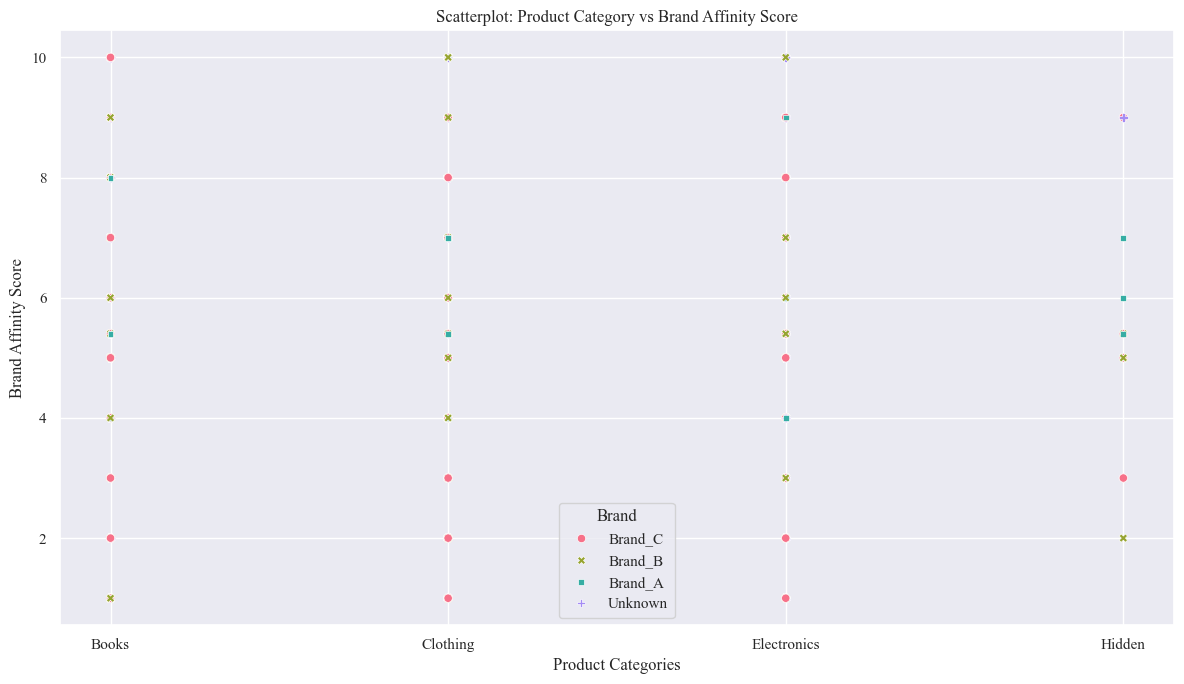

In [250]:
sns.scatterplot(x='Product_Category', y='Brand_Affinity_Score',hue='Brand',style='Brand', data=originaldataframe,palette='husl')
plt.xlabel('Product Categories')
plt.ylabel('Brand Affinity Score')
plt.title('Scatterplot: Product Category vs Brand Affinity Score')
plt.tight_layout()
plt.show()

2. Heat Map

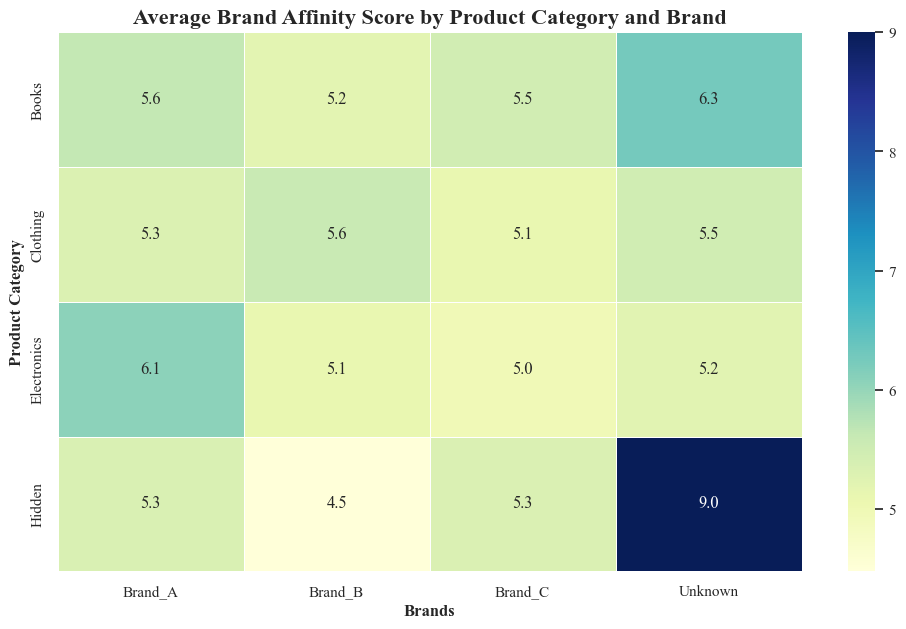

In [251]:
pivot_table = originaldataframe.pivot_table(values='Brand_Affinity_Score', index='Product_Category', columns='Brand', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.xlabel('Brands',fontweight='bold')
plt.ylabel('Product Category',fontweight='bold')
plt.title('Average Brand Affinity Score by Product Category and Brand',fontsize=16,fontweight='bold')
plt.show()

- The heatmap reveals patterns in brand affinity across different product categories and brands:
    - Brand A is more prefered in electronics sales
    - Brand B has most sales in Clothing Category
    - Brand C has most sales in Books category

3. Pivot Table

In [252]:
brand_affinity_vs_product_category_pivot_table = originaldataframe.pivot_table(values='Brand_Affinity_Score',index='Product_Category',columns='Brand',aggfunc=['mean','max'])
brand_affinity_vs_product_category_pivot_table

mean                                   max          \
Brand              Brand_A   Brand_B   Brand_C   Unknown Brand_A Brand_B   
Product_Category                                                           
Books             5.644681  5.187879  5.467368  6.272727    10.0    10.0   
Clothing          5.313043  5.584783  5.100901  5.470000    10.0    10.0   
Electronics       6.074000  5.107692  4.973643  5.234783    10.0    10.0   
Hidden            5.350000  4.480000  5.342857  9.000000     7.0     5.4   

                                  
Brand            Brand_C Unknown  
Product_Category                  
Books               10.0    10.0  
Clothing            10.0    10.0  
Electronics         10.0    10.0  
Hidden               9.0     9.0

- Purchase Frequency VS Age

1. Scatter Plot

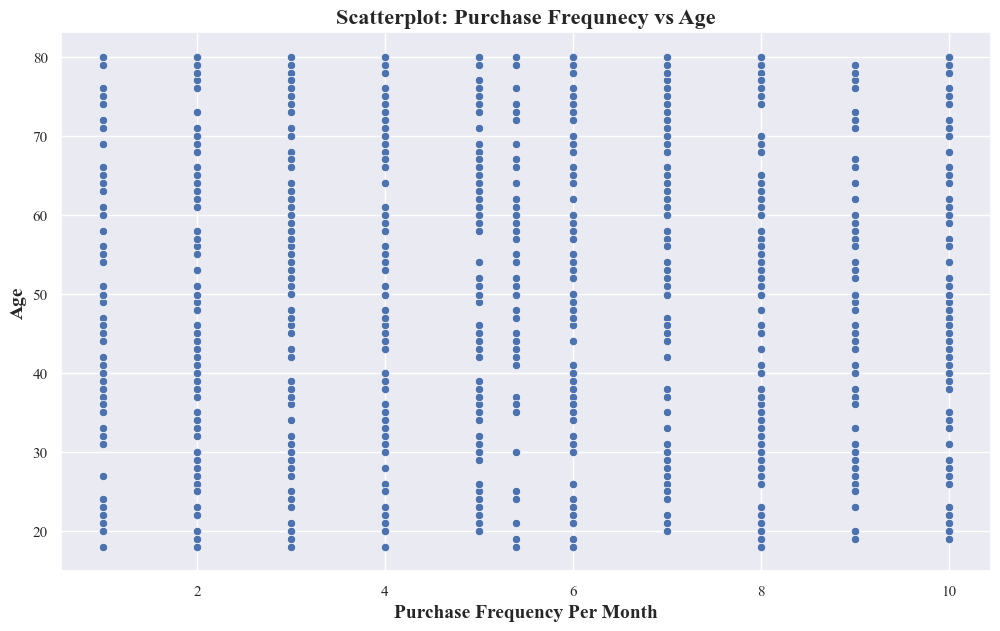

In [253]:
sns.scatterplot(x='Purchase_Frequency_Per_Month', y='Age', data=originaldataframe)
plt.xlabel('Purchase Frequency Per Month',fontsize=14,fontweight='bold')
plt.ylabel('Age',fontsize=14,fontweight='bold')
plt.title('Scatterplot: Purchase Frequnecy vs Age',fontsize=16,fontweight='bold')
plt.show()

- The scatter plot doesn't show a clear linear relationship between purchase frequency and age. Age alone isn't a strong predictor of purchase frequency.
- People of similar ages exhibit different purchase frequencies.
Potential Clusters or Patterns: While there's no overall linear trend, there might be subtle clusters or patterns within the data.

2. Pivot Table using different Age bins

In [254]:
originaldataframe['Age_Group'] = pd.cut(originaldataframe['Age'], bins=10)
pivot_table_age_purchase_freq = originaldataframe.pivot_table(values='Purchase_Frequency_Per_Month', 
                                                            index='Age_Group', 
                                                            aggfunc=['mean'])
pivot_table_age_purchase_freq

,mean
,Purchase_Frequency_Per_Month
Age_Group,
"(17.938, 24.2]",5.463636
"(24.2, 30.4]",5.946835
"(30.4, 36.6]",4.984615
"(36.6, 42.8]",4.857447
"(42.8, 49.0]",5.585185
"(49.0, 55.2]",5.570968
"(55.2, 61.4]",5.874000
"(61.4, 67.6]",5.139024


3. Correlation Between Age and Purchase Frequency Per Month

In [255]:
purchase_frequency_by_age_corr = originaldataframe['Age'].corr(originaldataframe['Purchase_Frequency_Per_Month'])
print(f"Correlation between Age and Purchase Frquency Per Month is : {purchase_frequency_by_age_corr:.4f}")

Correlation between Age and Purchase Frquency Per Month is : -0.0044


4. Point Chart to show the different age groups and their Purchase Frequency Per Month

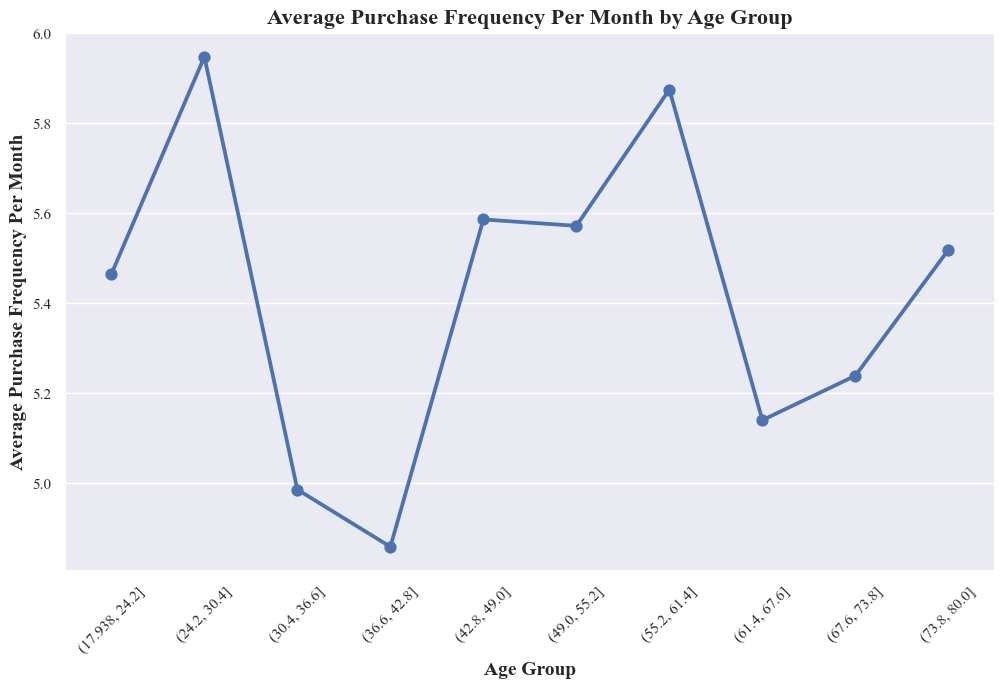

In [256]:
sns.pointplot(data=originaldataframe, x='Age_Group', y='Purchase_Frequency_Per_Month', errorbar=None)
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Average Purchase Frequency Per Month', fontsize=14, fontweight='bold')
plt.title('Average Purchase Frequency Per Month by Age Group', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


- There's a clear association between age group and average purchase frequency, but it's not a simple linear relationship.
- People in their late 40s tend to make purchases more frequently on average, while older and younger age groups tend to have slightly lower purchase frequencies.
- The peak purchase frequency around age group from 42.8 to 49.0

5. Strip Plot

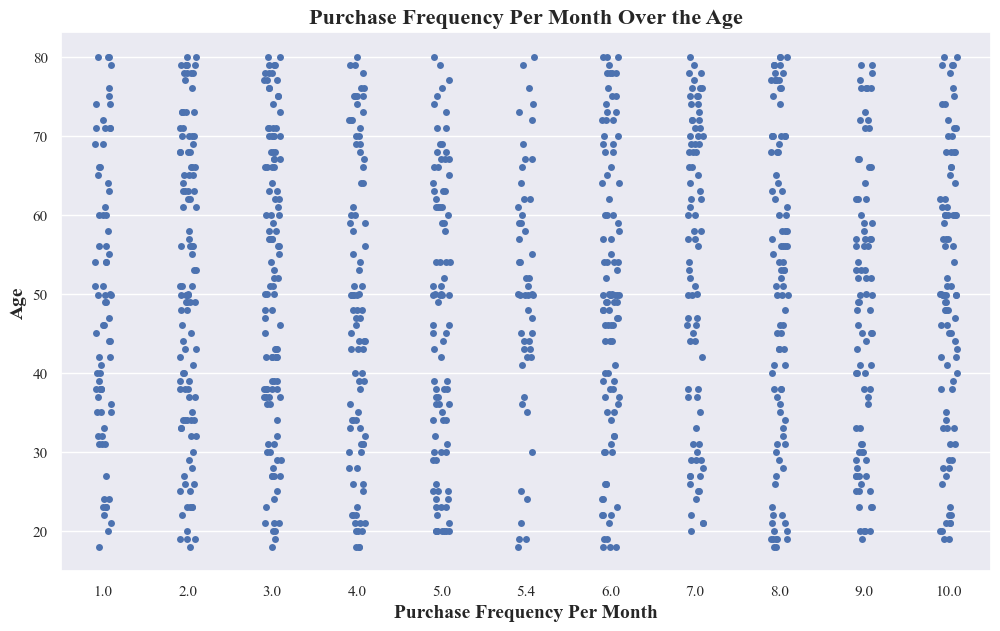

In [257]:
sns.stripplot(data=originaldataframe, x="Purchase_Frequency_Per_Month", y="Age")
plt.xlabel('Purchase Frequency Per Month',fontsize=14,fontweight='bold')
plt.ylabel('Age',fontsize=14,fontweight='bold')
plt.title("Purchase Frequency Per Month Over the Age",fontsize=16,fontweight='bold')
plt.show()

- The above plot doesn't show a clear linear relationship between purchase frequency and age. This suggests that age alone might not be a strong predictor of how often someone makes purchases.
- It reveals variability in purchase frequency within different age groups. This means that even people of similar ages can have different purchasing patterns.

#### 3. Temporal Analysis:

- Trends in customer behavior over time

1. Line Plot For Trends in Purchase Frequency Per Month Over the Months Across Years

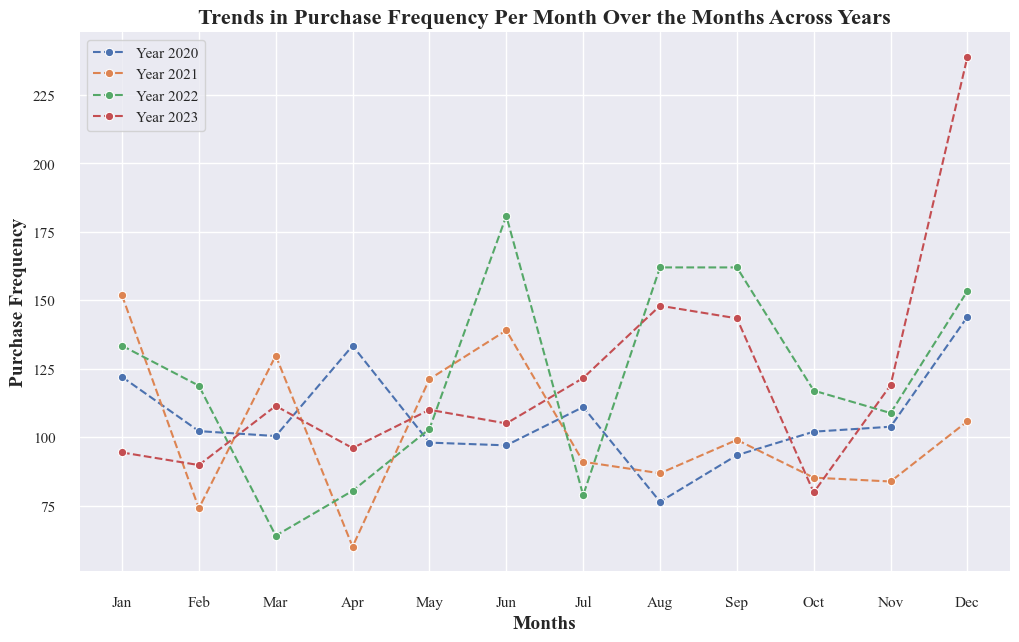

In [258]:
purchase_frequency_per_month_over_months = originaldataframe.groupby([originaldataframe['Purchase_Date'].dt.year, originaldataframe['Purchase_Date'].dt.month])['Purchase_Frequency_Per_Month'].sum()
for year in purchase_frequency_per_month_over_months.index.levels[0]:
    year_data = purchase_frequency_per_month_over_months.loc[year]
    sns.lineplot(x=year_data.index, y=year_data.values, marker='o', linestyle='dashed', label=f'Year {year}')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Trends in Purchase Frequency Per Month Over the Months Across Years',fontsize=16,fontweight='bold')
plt.xlabel('Months',fontsize=14,fontweight='bold')
plt.ylabel('Purchase Frequency',fontsize=14,fontweight='bold')
plt.legend()
sns.despine(offset=8, trim=True)
plt.show()


- Purchase frequency has generally increased over the years, from 2020 to 2023.
- Purchases tend to peak in certain months, which are likely influenced by seasonal factors or specific events.
- The graph suggests some consistent patterns in purchase behavior, such as higher purchase frequencies in certain months (e.g., November and December, potentially due to holiday shopping).
- The lowest purchase frequency consistently occurs in May.
- In 2023, the trend line is slightly lower than in 2022 for some months, suggesting a potential shift that requires monitoring.

2. Trends in Average Spending Per Purchase Over the Months Across Years 
    - Line Plot for Trends in Average Spending Per Purchase Over the Months Across Years

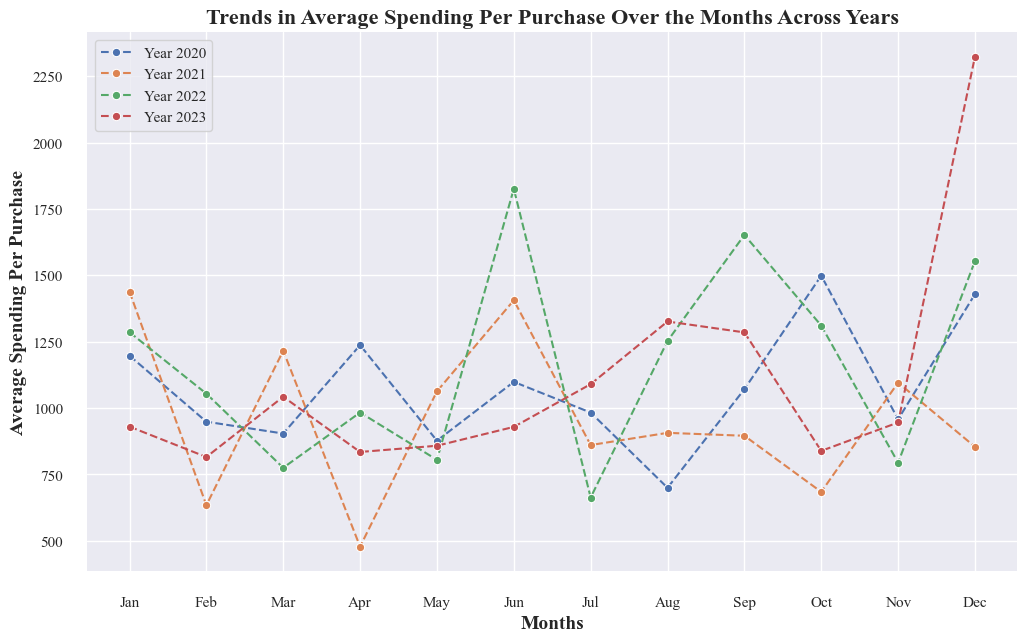

In [259]:
avg_spendings_per_purchase_over_months = originaldataframe.groupby([originaldataframe['Purchase_Date'].dt.year, originaldataframe['Purchase_Date'].dt.month])['Average_Spending_Per_Purchase'].sum()
for year in avg_spendings_per_purchase_over_months.index.levels[0]:
    year_data = avg_spendings_per_purchase_over_months.loc[year]
    sns.lineplot(x=year_data.index, y=year_data.values, marker='o', linestyle='dashed', label=f'Year {year}')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Trends in Average Spending Per Purchase Over the Months Across Years',fontsize=16,fontweight='bold')
plt.xlabel('Months',fontsize=14,fontweight='bold')
plt.ylabel('Average Spending Per Purchase',fontsize=14,fontweight='bold')
plt.legend()
sns.despine(offset=8, trim=True)
plt.show()


- Average Spending Per Purchase has increased steadily from 2020 to 2023. This is the most notable trend in the graph, with a clear upward slope across all years.
- **There are significant monthly fluctuations within each year.** These fluctuations are not consistent across years, but there are some general patterns:
    - **Average Spending Per Purchase tends to be higher in the latter half of the year, from October to December.** This could be due to holiday shopping or back-to-school season.
    - **Average Spending Per Purchase tends to be lower in the first half of the year, from January to April.** This could be due to post-holiday spending fatigue or the start of the school year.

- **2023 has the highest Average Spending Per Purchase of all years.** This is especially evident in the later months of the year, where the 2023 line is consistently above the lines for previous years.
- **May is consistently the month with the lowest Average Spending Per Purchase across all years.** This is an interesting finding, as it suggests that there may be specific factors at play that depress spending in May, regardless of the overall upward trend.
- **There is a sharp spike in Average Spending Per Purchase in November 2023.** This could be due to Black Friday or Cyber Monday shopping.
- Overall, the graph shows a positive trend of increasing Avregae Spending per purchase over time.

*Product Category Counts by Month and Year*

1. Heatmap to show the purchase count of product category over months of years

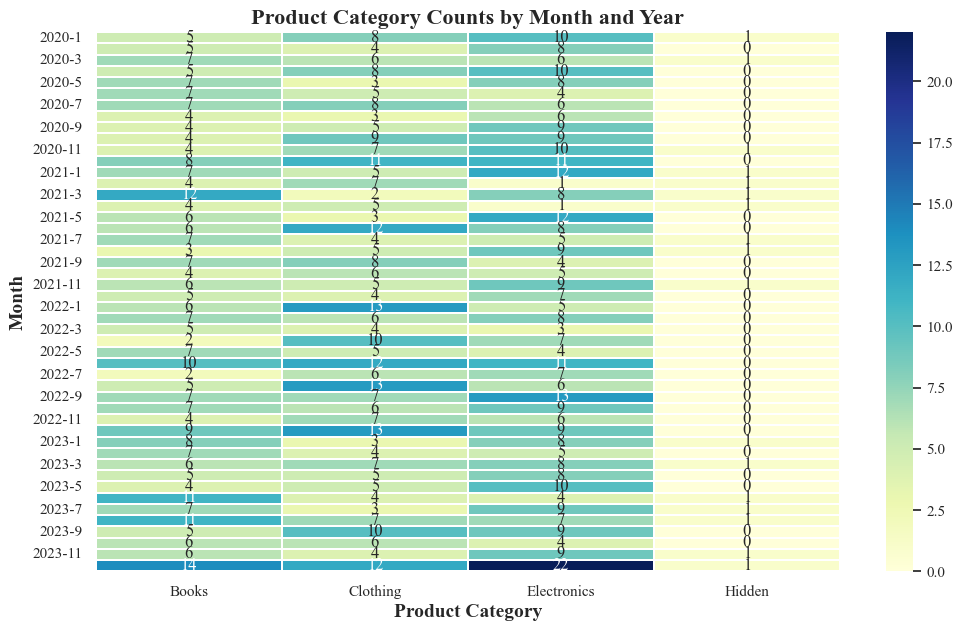

In [260]:
product_category_over_months = originaldataframe.groupby([originaldataframe['Purchase_Date'].dt.year, 
                                                          originaldataframe['Purchase_Date'].dt.month, 
                                                          'Product_Category'], observed=True)['Product_Category'].count().unstack().fillna(0)

sns.heatmap(product_category_over_months, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.1)
plt.xlabel('Product Category', fontsize=14, fontweight='bold')
plt.ylabel('Month', fontsize=14, fontweight='bold')
plt.title('Product Category Counts by Month and Year', fontsize=16, fontweight='bold')
plt.show()


- The sales of electronics items are mostly in the months from November to January.
- The lowest purchase of electronic items consistently occurs in May.
- In November 2023, most electronic items are sold. 

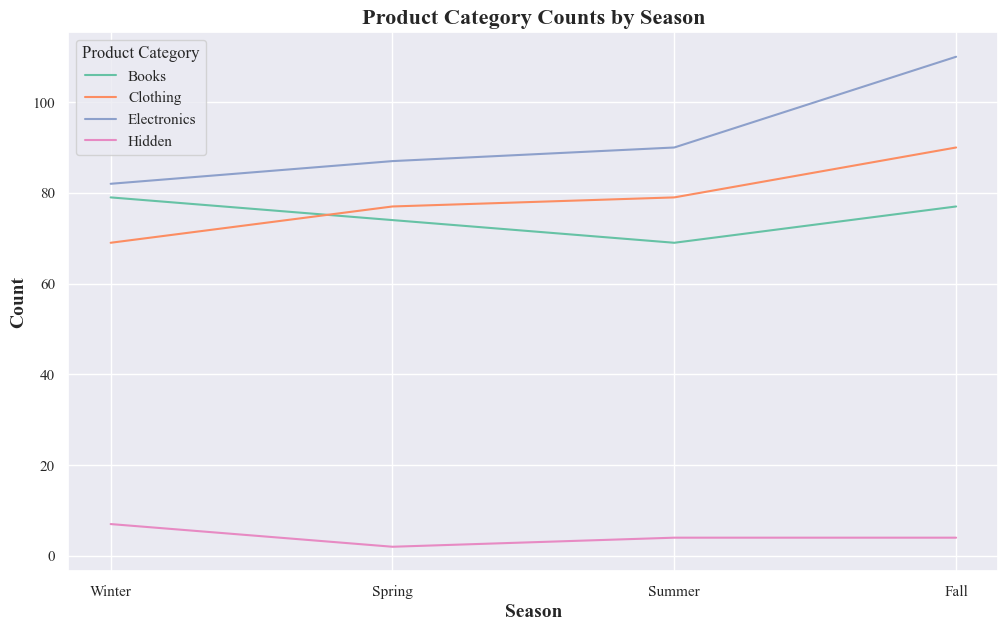

In [261]:
seasonal_product_counts = originaldataframe.groupby(['Season', 'Product_Category'],observed=True).size().reset_index(name='Count')

sns.lineplot(data=seasonal_product_counts, x='Season', y='Count', hue='Product_Category', palette='Set2')
plt.title('Product Category Counts by Season',fontsize=16,fontweight='bold')
plt.xlabel('Season', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.legend(title='Product Category')
plt.show()


- Electronics category exhibits a distinct seasonal pattern. Its count fluctuates significantly across seasons, with peaks in winter and dips in summer. Other categories also show seasonal variations, but the magnitude is less pronounced compared to electronics.

- Electronics Category:
    - **Winter:** The highest electronics category counts occur in **December and January**, likely driven by holiday shopping and gift-giving.
    - **Spring:** Electronics category counts drop but remain **relatively stable** from February to April.
    - **Summer:** The lowest electronics category counts occur in **May June and July**.
    - **Fall:** Electronics category counts start to **rebound** in September and October, potentially due to pre-holiday promotions or cooler weather prompting renewed interest in electronics.


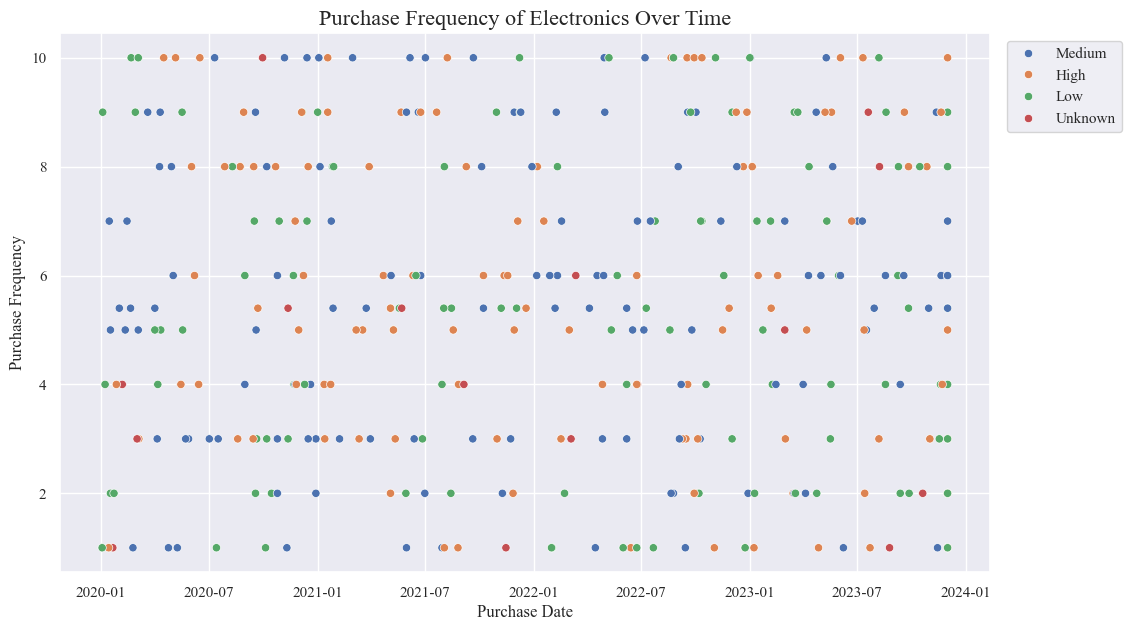

In [292]:
electronics_data = originaldataframe[originaldataframe['Product_Category'] == 'Electronics']

sns.scatterplot(data=electronics_data, x='Purchase_Date', y='Purchase_Frequency_Per_Month',hue='Income_Level')
plt.title('Purchase Frequency of Electronics Over Time', fontsize=16)
plt.xlabel('Purchase Date', fontsize=12)
plt.ylabel('Purchase Frequency', fontsize=12)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


- Mostly the people with the Medium and high Income Level have the most purchase frequnecy. 

In [263]:
y =electronics_data['Purchase_Date'].dt.year
pt = electronics_data.pivot_table(values='Purchase_Frequency_Per_Month',index=y,columns='Income_Level',aggfunc=['count','mean'])
pt

count                         mean                              
Income_Level   High Low Medium Unknown      High       Low    Medium   Unknown
Purchase_Date                                                                 
2020             24  30     38       5  6.308333  5.033333  5.136842  4.680000
2021             33  18     27       3  5.448485  6.111111  6.155556  3.466667
2022             25  26     34       3  5.336000  5.092308  5.741176  4.333333
2023             32  35     30       6  5.325000  5.337143  5.706667  4.500000

- 2023 has the highest count for both high and low income groups.
- 2020 has the highest count for the medium income group.
- Mean values also fluctuate across income levels and years, suggesting potential differences in spending patterns or other numerical metrics.
- The "Unknown" income group has consistently lower counts and mean values.

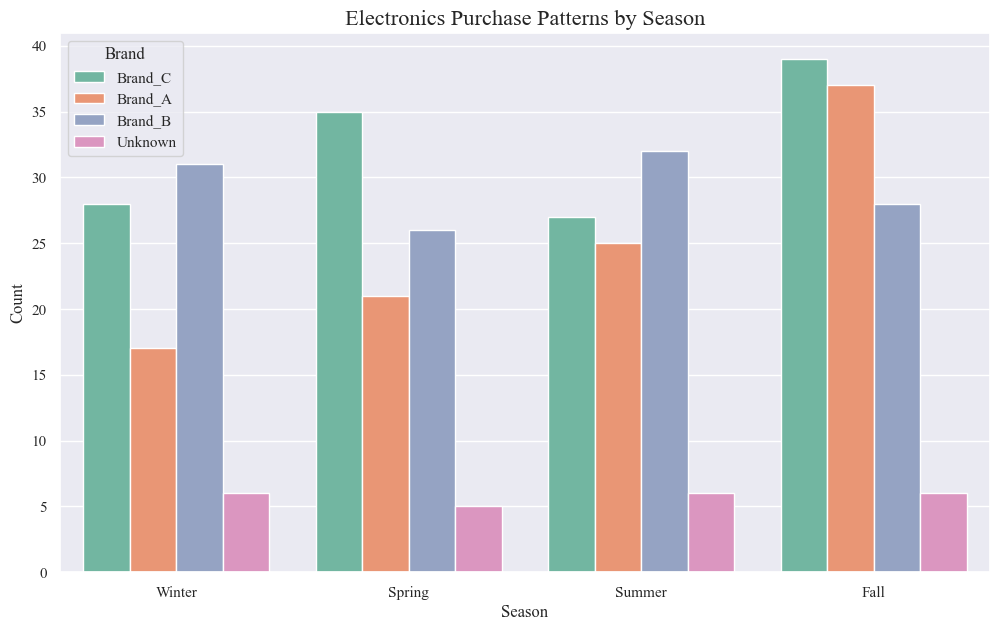

In [264]:
sns.countplot(data=electronics_data, x='Season', palette='Set2',hue='Brand')
plt.title('Electronics Purchase Patterns by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


- Electronics purchases vary by season. The highest number of purchases occur in the winter, followed by the fall, spring, and summer.
- Brand C is the most popular brand overall. It has the highest number of purchases in every season except summer.
- A significant number of purchases are for unknown brands. This suggests that there may be opportunities to promote brand awareness among electronics consumers.

**Seasonal trends:**
- **Winter (December, January):** Electronics purchases peak in the winter.
- **Spring:** Purchases decline in the spring.
- **Summer:** Purchases remain relatively low in the summer.
- **Fall:** Purchases increase again in the fall.

**Brand-specific trends:**

- **Brand C:** Consistently the most popular brand, with particularly strong sales in the winter and fall.
- **Brand A:** Second most popular brand overall, with relatively consistent sales across all seasons.
- **Brand B:** Less popular than brands A and C, with sales peaking in the winter and fall.

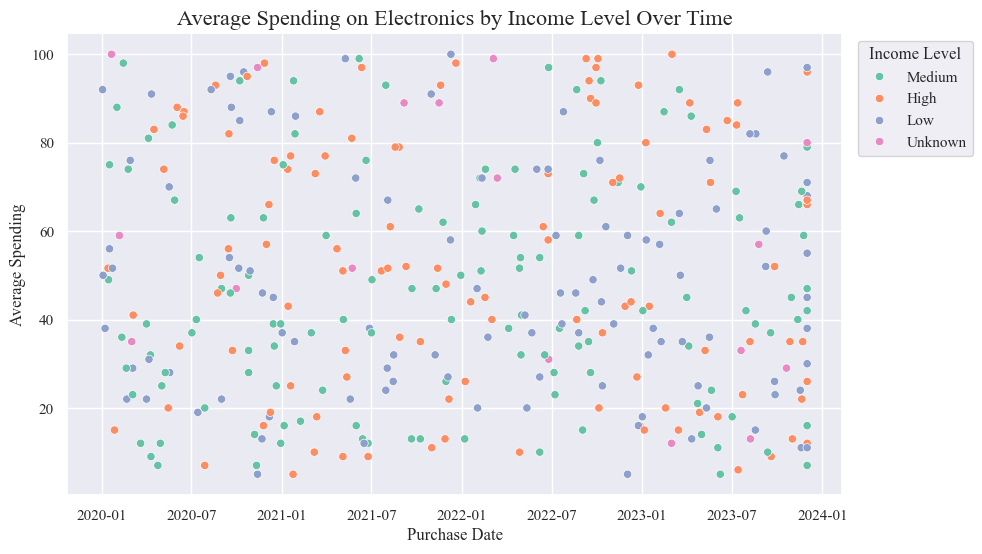

In [265]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=electronics_data, x='Purchase_Date', y='Average_Spending_Per_Purchase', hue='Income_Level', palette='Set2')
plt.title('Average Spending on Electronics by Income Level Over Time', fontsize=16)
plt.xlabel('Purchase Date', fontsize=12)
plt.ylabel('Average Spending', fontsize=12)
plt.legend(title='Income Level', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


- People with high income levels consistently spend the most on electronics, followed by those with medium income levels.
- Average spending on electronics has generally increased over time for all income levels.
- There was a sharp increase in average spending in mid-2021 for all income levels.
- Average spending has remained relatively stable since late 2022.

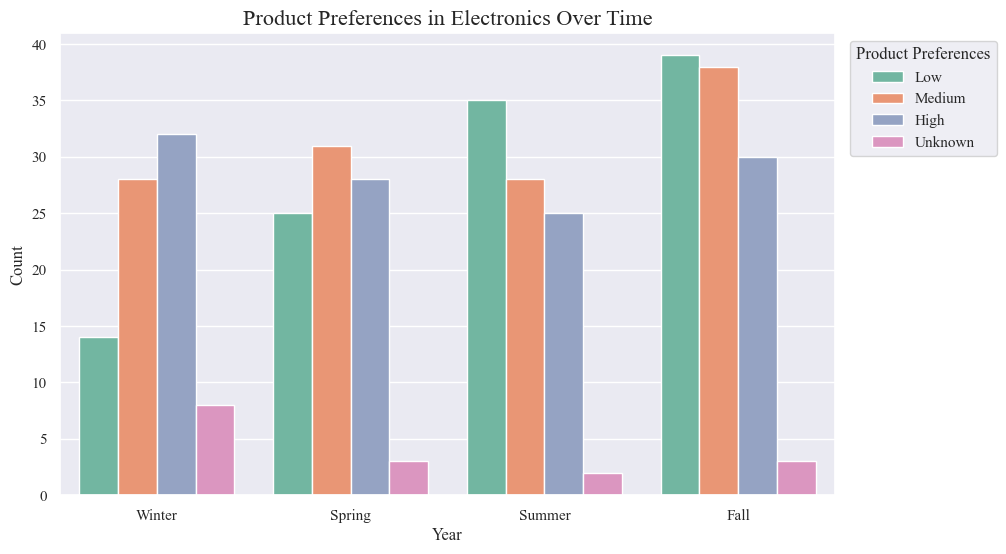

In [266]:
# Product preferences in Electronics over time
plt.figure(figsize=(10, 6))
sns.countplot(data=electronics_data, x='Season',hue='Product_Category_Preferences', palette='Set2')
plt.title('Product Preferences in Electronics Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Product Preferences', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


- Product preferences in electronics change across different seasons.
- "Low" preference products see the most distinct seasonal variation, with peaks in winter and fall.

**Seasonal trends:**

- **Winter:** "High" preference products peak.
- **Spring:** "Low" preference products decline, while "Medium" and "High" preferences remain relatively stable.
- **Summer:** Preferences stay consistent with Spring.
- **Fall:** "Low" and "Medium" preference products experience another surge.

**Product preference insights:**

- Distinct seasonal trends for "Low" preference products suggest potential opportunities for targeted marketing or inventory strategies.
- Relative stability of "Medium" and "High" preferences across seasons implies a steadier demand for these categories.

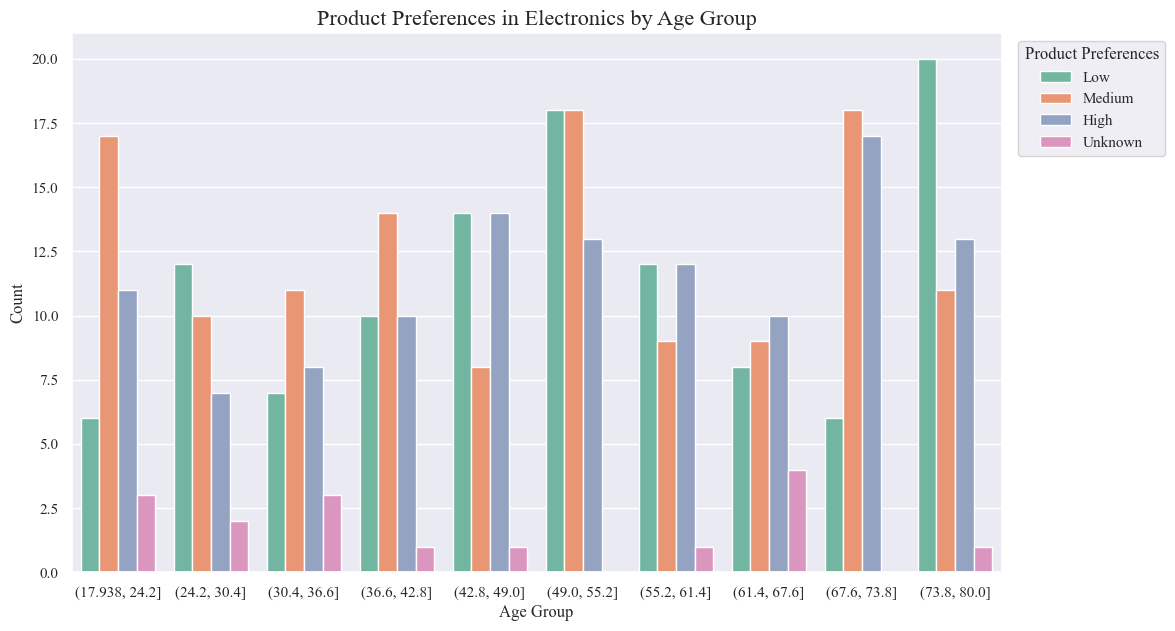

In [267]:
sns.countplot(data=electronics_data, x='Age_Group', hue='Product_Category_Preferences', palette='Set2')
plt.title('Product Preferences in Electronics by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Product Preferences', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()


**Age-Specific Findings:**

- **Younger Age Groups (17.9-42.8):**
    - Exhibit the highest preference for "Low" preference products.
    - May prioritize affordability, trendiness, or entry-level features.
- **Middle Age Groups (42.8-55.2):**
    - Show a more balanced distribution of preferences, with a slight shift towards "Medium" and "High" preference products.
    - May consider factors like quality, functionality, and brand reputation more heavily.
- **Older Age Groups (55.2-80.0):**
    - Demonstrate the strongest preference for "High" preference products.
    - May prioritize reliability, durability, advanced features, or specific needs related to accessibility or health.

*Gender with most Purchases in Electronics by Income Level*

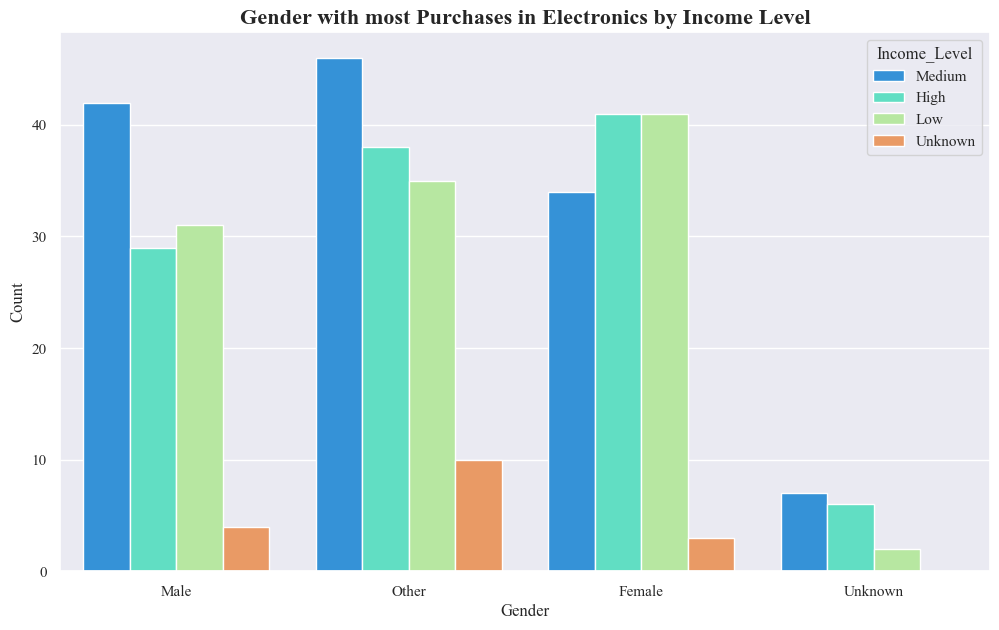

In [268]:
sns.countplot(data=electronics_data, x='Gender', palette='rainbow',hue='Income_Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender with most Purchases in Electronics by Income Level',fontsize=16,fontweight='bold')
plt.show()

* The highest number of purchases are made by Other Gender in the medium income level.
* Males in the Medium income level also seem to make a significant number of purchases.
* Females with the High and Low Income level nearly have same no of purchases.
* Overall, people with higher incomes tend to make more electronics purchases than people with lower incomes.

## Module 3: Clustering Analysis:

### A: KMeans 
1. Determine the optimal number of clusters (k) using elbow method

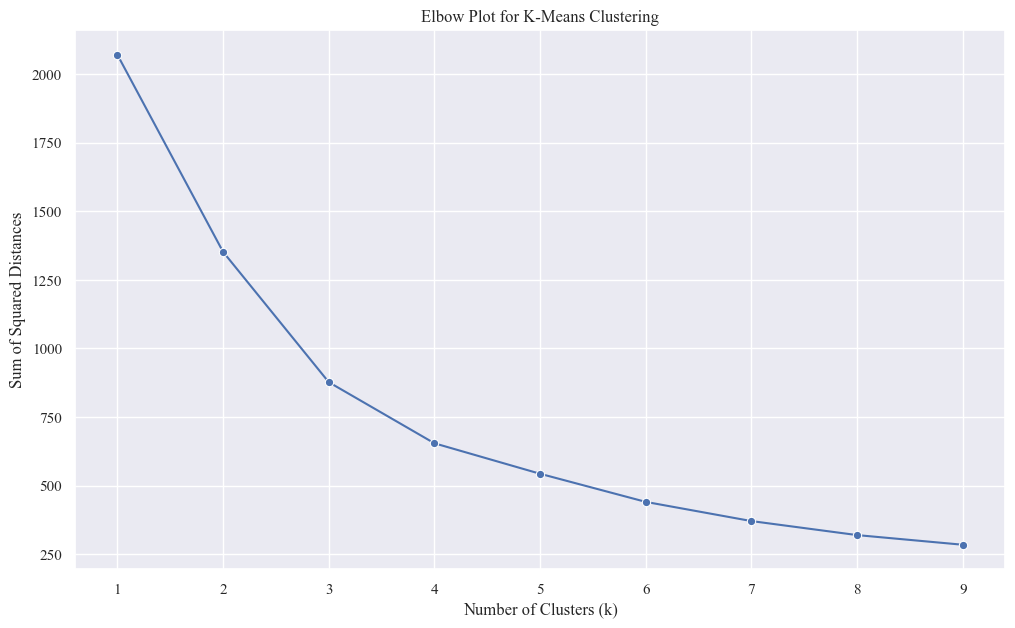

In [269]:
sum_of_squares = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k,n_init=10 ,random_state=42)
    km = km.fit(X_pca_scaled)
    sum_of_squares.append(km.inertia_)


sns.lineplot(x=K_range, y=sum_of_squares, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for K-Means Clustering')
plt.show()

- As *k* increases, SSD(Sum of Squared Distance) generally decreases. This is because more clusters allow for better fit to the data, reducing within-cluster distances.
- The goal is to find the k where the SSDcurve starts to level off significantly, forming an "elbow." This point suggests a balance between fitting the data well and avoiding overfitting with too many clusters.
- The graph exhibits a noticeable elbow around k=4. Beyond this point, the SSD reduction becomes less pronounced, indicating diminishing returns in adding more clusters.
- k=4 is a strong candidate for the optimal number of clusters for your dataset.

2. Apply KMeans Algorithm

In [270]:
optimal_k=4
km = KMeans(n_clusters=optimal_k,n_init=10,random_state=42)
originaldataframe['KMeans_Cluster'] = km.fit_predict(X_pca_scaled)
X_pca_df['KMeans_Cluster'] = km.fit_predict(X_pca_scaled)


3. Analyze the Clusters 

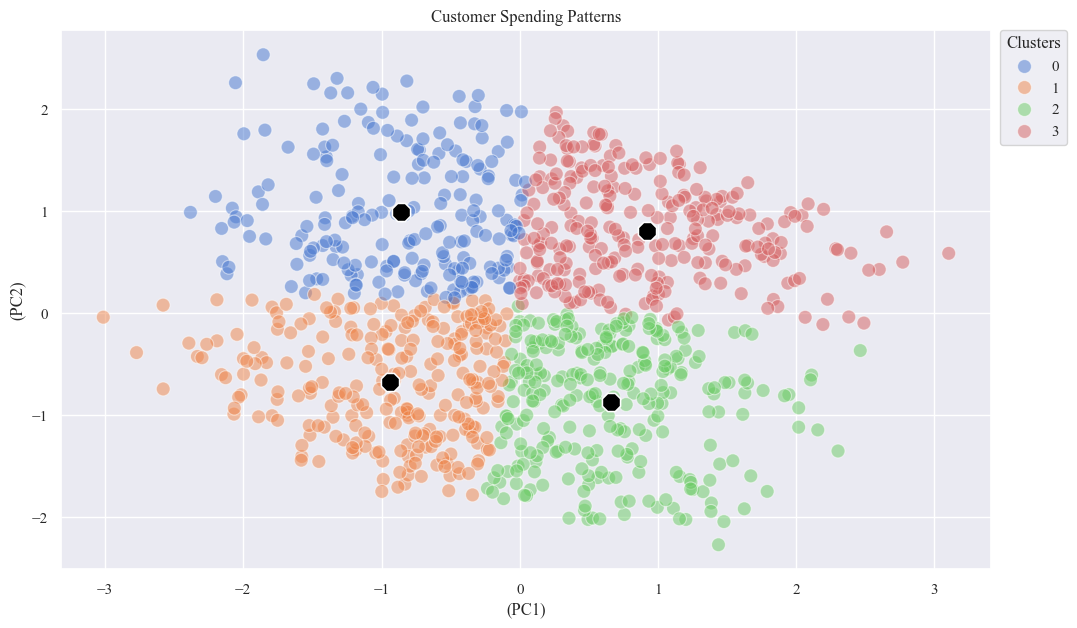

In [271]:
centers = X_pca_df.groupby('KMeans_Cluster').mean()

sns.scatterplot(x='PC1', y='PC2', data=X_pca_df, hue='KMeans_Cluster', palette='muted', s=100, alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', data=centers, marker='8', s=200, color='black')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')
plt.title('Customer Spending Patterns')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title='Clusters')
plt.show()

### B. DBSCAN Algorithm
1. Finding the best eps and min samples using silhouette_score

In [272]:
eps_values = [0.1,0.25,0.5]
min_samples_values = [2,3,5]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca_scaled)

        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(X_pca_scaled, labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best parameters", best_eps, "MinPts:", best_min_samples)

Best parameters 0.5 MinPts: 5


2. Applying DBSCAN Algorithm

In [273]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
X_pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_pca_scaled)

3. Analyze the Clusters

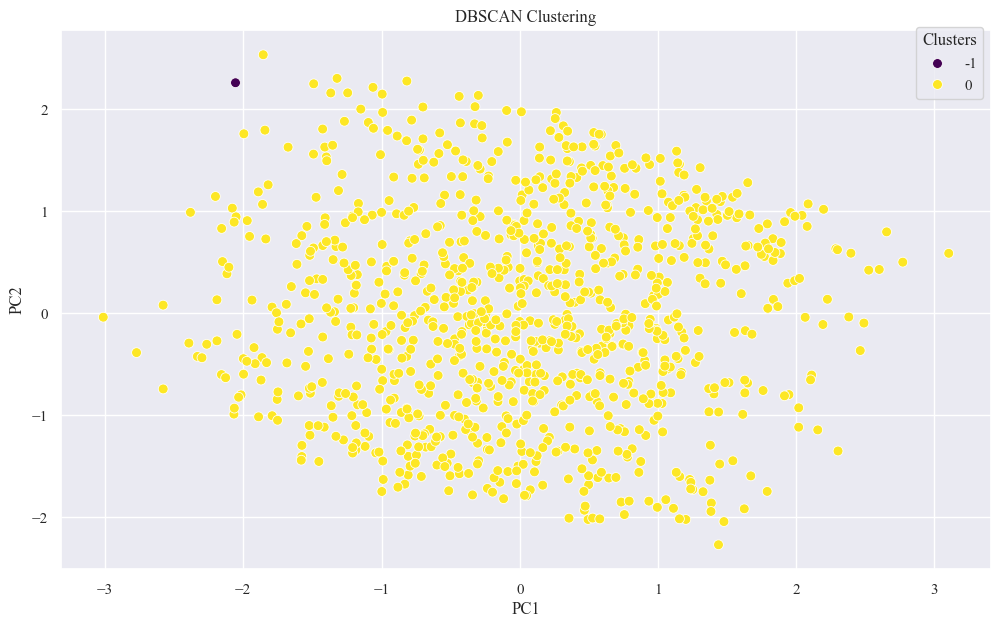

In [274]:
sns.scatterplot(x="PC1", y="PC2", hue='DBSCAN_Cluster', data=X_pca_df, palette='viridis', s=50)

plt.title(f'DBSCAN Clustering')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1.02))
plt.show()

4. Best eps using K Distance Graph

Optimal eps: 0.54


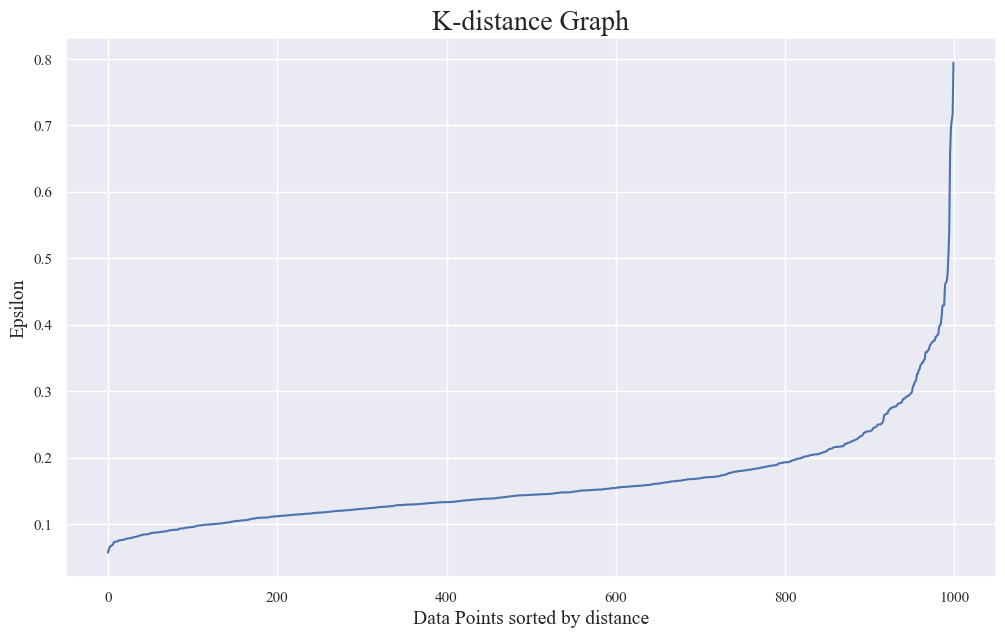

In [275]:

import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(X_pca_scaled)
distances, indices = nbrs.kneighbors(X_pca_scaled)

def find_optimal_eps(distances):
    differences = np.diff(distances)
    knee_point_index = np.argmax(differences)
    optimal_eps = distances[knee_point_index]
    return optimal_eps

distances = np.sort(distances, axis=0)
distances = distances[:, 5]

optimal_eps = find_optimal_eps(distances)
print(f'Optimal eps: {optimal_eps:.2f}')

plt.plot(distances)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()


### C. KMeans++ Algorithm
1. Applying KMeans++ Using the above elbow method

In [276]:
kmeans_pp = KMeans(n_clusters=optimal_k, n_init=10,init='k-means++', random_state=42)
X_pca_df['KMeans++_Cluster'] = kmeans_pp.fit_predict(X_pca_scaled)


2. Analyzing the clusters

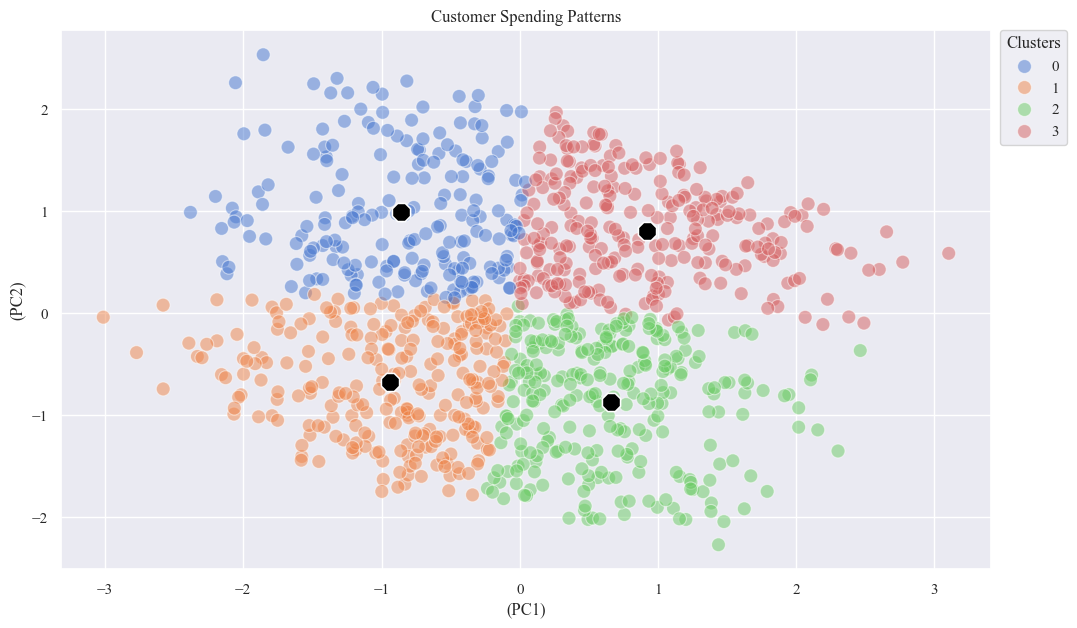

In [277]:
centers = X_pca_df.groupby('KMeans++_Cluster').mean()

sns.scatterplot(x='PC1', y='PC2', data=X_pca_df, hue='KMeans++_Cluster', palette='muted', s=100, alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', data=centers, marker='8', s=200, color='black')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')
plt.title('Customer Spending Patterns')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title='Clusters')
plt.show()

Applying all this algorithms on the electronics categogory only to analyze the cutsomer behaviors regarding electronics

### Data Normalization

In [278]:
numeric_columns = ['Age',"Purchase_Amount", "Average_Spending_Per_Purchase", "Purchase_Frequency_Per_Month", "Brand_Affinity_Score"]
X=electronics_data[numeric_columns]
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca_scaled_data = pca.fit_transform(X_scaled_data)
X_pca_edf = pd.DataFrame(X_pca_scaled_data , columns=['PC1', 'PC2'])

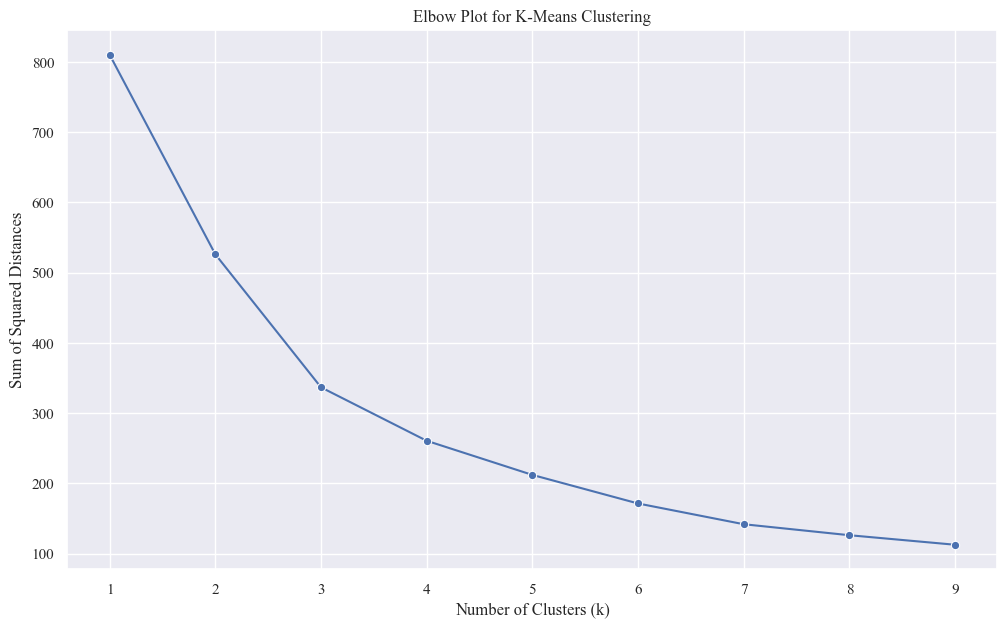

In [279]:
sum_of_squares = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k,n_init=10 ,random_state=42)
    km = km.fit(X_pca_scaled_data)
    sum_of_squares.append(km.inertia_)


sns.lineplot(x=K_range, y=sum_of_squares, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for K-Means Clustering')
plt.show()

In [280]:
optimal_k_edf = 3
kmeans_pp_e = KMeans(n_clusters=optimal_k_edf, n_init=10, random_state=42)
X_pca_edf['KMeans_Cluster'] = kmeans_pp_e.fit_predict(X_pca_scaled_data)


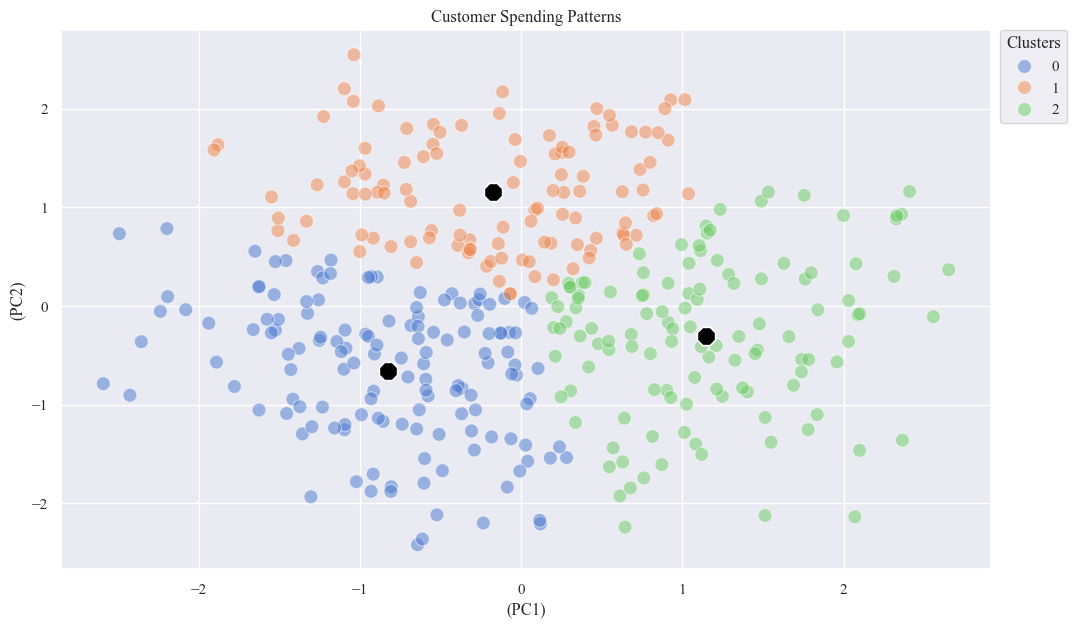

In [281]:
centers = X_pca_edf.groupby('KMeans_Cluster').mean()

sns.scatterplot(x='PC1', y='PC2', data=X_pca_edf, hue='KMeans_Cluster', palette='muted', s=100, alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', data=centers, marker='8', s=200, color='black')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')
plt.title('Customer Spending Patterns')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title='Clusters')
plt.show()

- Cluster 0:
 Customers in this cluster tend to have lower values on both PC1 and PC2. They might represent more value-conscious spenders.
- Cluster 1: 
Customers in this cluster have moderate values on PC1 and higher values on PC2. They might represent those who prioritize specific spending categories.
- Cluster 2: 
Customers in this cluster have higher values on both PC1 and PC2. They might represent those with higher overall spending or more diverse spending habits.

In [282]:
eps_values = [0.1,0.25,0.5]
min_samples_values = [2,3,5]

best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_pca_scaled_data)

        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(X_pca_scaled_data, labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print("Best parameters", best_eps, "MinPts:", best_min_samples)

Best parameters 0.5 MinPts: 5


In [283]:
dbscan_e = DBSCAN(eps=best_eps, min_samples=best_min_samples)
X_pca_edf['DBSCAN_Cluster'] = dbscan_e.fit_predict(X_pca_scaled_data)

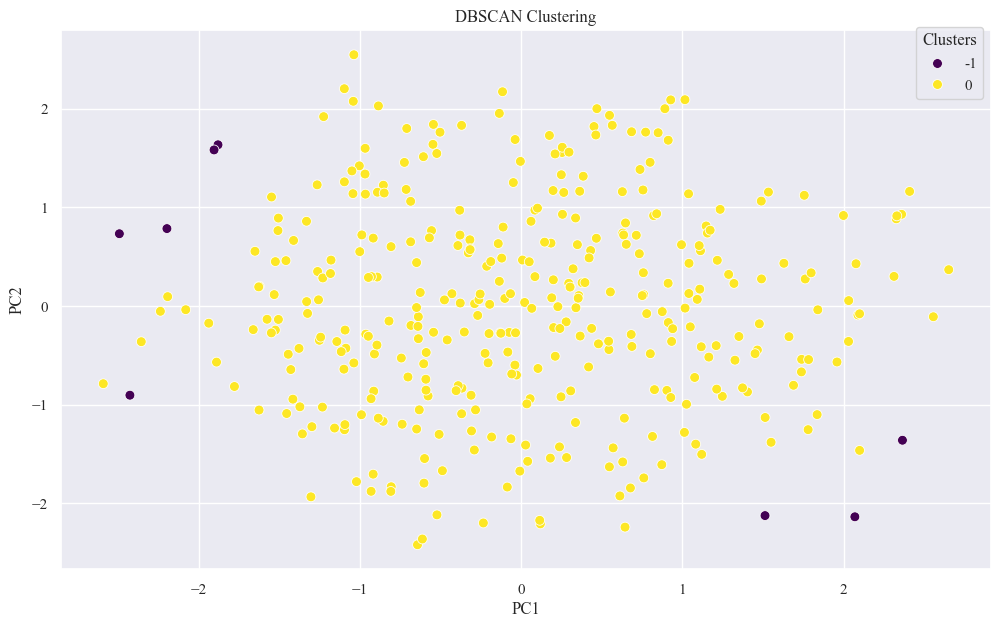

In [284]:
sns.scatterplot(x="PC1", y="PC2", hue='DBSCAN_Cluster', data=X_pca_edf, palette='viridis', s=50)
plt.title(f'DBSCAN Clustering')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1.02))
plt.show()

In [285]:
kmeans_pp_e = KMeans(n_clusters=optimal_k, n_init=10,init='k-means++', random_state=42)
X_pca_edf['KMeans++_Cluster'] = kmeans_pp_e.fit_predict(X_pca_scaled_data)

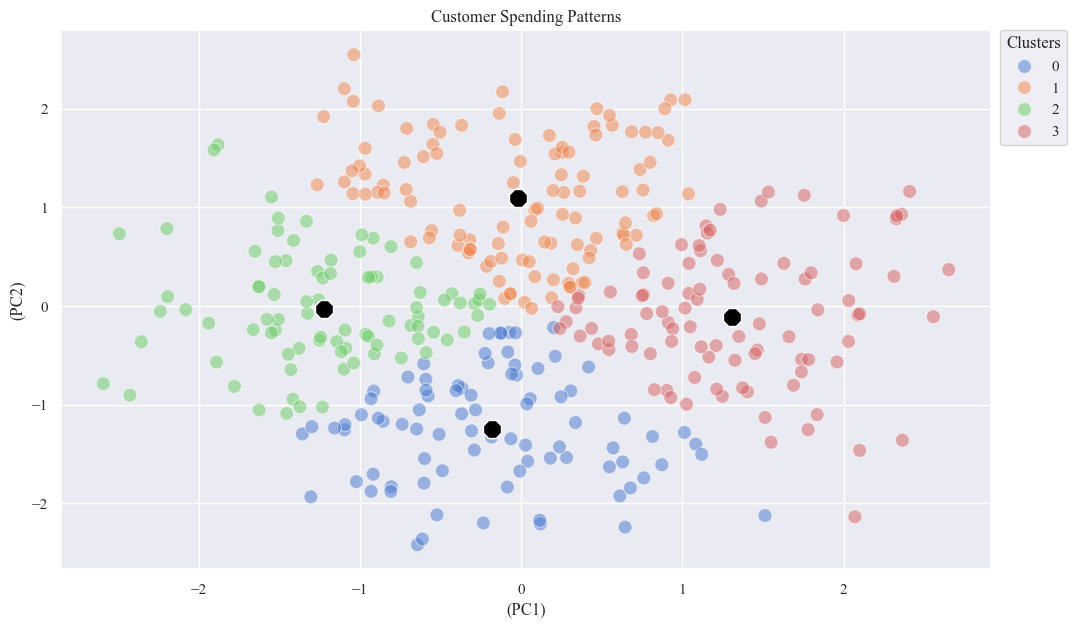

In [286]:
centers = X_pca_edf.groupby('KMeans++_Cluster').mean()

sns.scatterplot(x='PC1', y='PC2', data=X_pca_edf, hue='KMeans++_Cluster', palette='muted', s=100, alpha=0.5)
sns.scatterplot(x='PC1', y='PC2', data=centers, marker='8', s=200, color='black')
plt.xlabel('(PC1)')
plt.ylabel('(PC2)')
plt.title('Customer Spending Patterns')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., title='Clusters')
plt.show()

- Cluster Shapes and Separation:
    - K-Means and K-Means++ seem to create relatively well-defined and separated cluster with distinct shapes.
    - DBSCAN have identified some noise points as a separate cluster.
- Cluster Sizes and Distribution:
    - K-Means and K-Means++ have clusters of roughly similar sizes.
    - DBSCAN might have clusters of varying densities and sizes.
- Outliers:
    - K-Means and K-Means++ might be sensitive to outliers, potentially pulling cluster centers towards them.
    - DBSCAN is generally more robust to outliers, as it can classify them as noise.

## Module 4: Comparison and Conclusion:

In [287]:
pd.crosstab(X_pca_df['KMeans_Cluster'], X_pca_df['KMeans++_Cluster'])

KMeans++_Cluster,0,1,2,3
KMeans_Cluster,,,,
0,202,0,0,0
1,0,264,0,0
2,0,0,271,0
3,0,0,0,263


In [288]:
pd.crosstab(X_pca_df['DBSCAN_Cluster'], X_pca_df['KMeans++_Cluster'])

KMeans++_Cluster,0,1,2,3
DBSCAN_Cluster,,,,
-1,1,0,0,0
0,201,264,271,263


Silhouette Score - K-Means: 0.34
Convergence Time for Regular K-Means: 0.0940 seconds
Silhouette Score - DBSCAN: 0.38
Silhouette Score - K-Means++: 0.34
Convergence Time for K-Means++: 0.0800 seconds


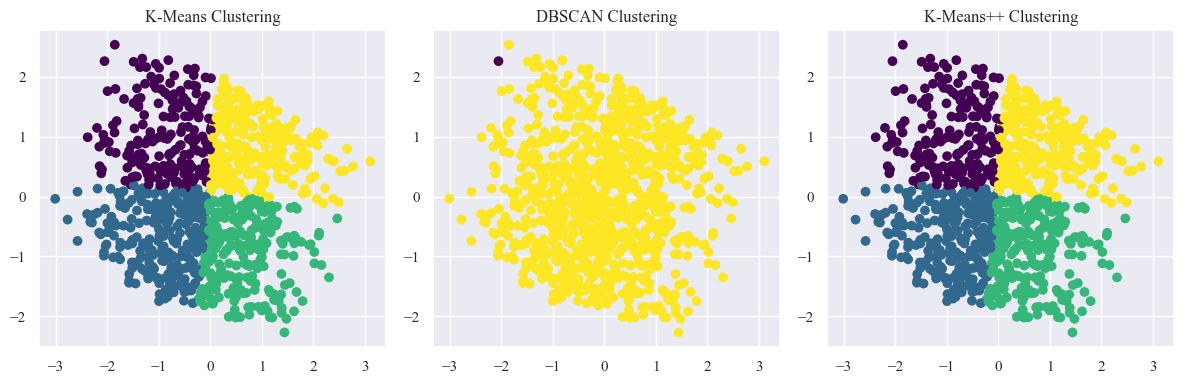

In [289]:
import time

start_time_kmeans = time.time()

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca_scaled)
kmeans_score = silhouette_score(X_pca_scaled, kmeans_labels)

end_time_kmeans = time.time()

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Replace with your optimal parameters
dbscan_labels = dbscan.fit_predict(X_pca_scaled)
dbscan_score = silhouette_score(X_pca_scaled, dbscan_labels)

# K-Means++
start_time_pp = time.time()
kmeans_plus = KMeans(n_clusters=4, n_init=10, init='k-means++', random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(X_pca_scaled)
kmeans_plus_score = silhouette_score(X_pca_scaled, kmeans_plus_labels)
end_time_pp = time.time()

# Print silhouette scores and convergence times
print(f"Silhouette Score - K-Means: {kmeans_score:.2f}")
print(f"Convergence Time for Regular K-Means: {end_time_kmeans - start_time_kmeans:.4f} seconds")
print(f"Silhouette Score - DBSCAN: {dbscan_score:.2f}")
print(f"Silhouette Score - K-Means++: {kmeans_plus_score:.2f}")
print(f"Convergence Time for K-Means++: {end_time_pp - start_time_pp:.4f} seconds")

# Visualize clusters
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=kmeans_plus_labels, cmap='viridis')
plt.title('K-Means++ Clustering')

plt.tight_layout()
plt.show()

*Electronic Data Comparision*

Silhouette Score - K-Means: 0.33
Silhouette Score - DBSCAN: 0.34
Silhouette Score - K-Means++: 0.33
Convergence Time for Regular K-Means: 0.0520 seconds
Convergence Time for K-Means++: 0.0550 seconds


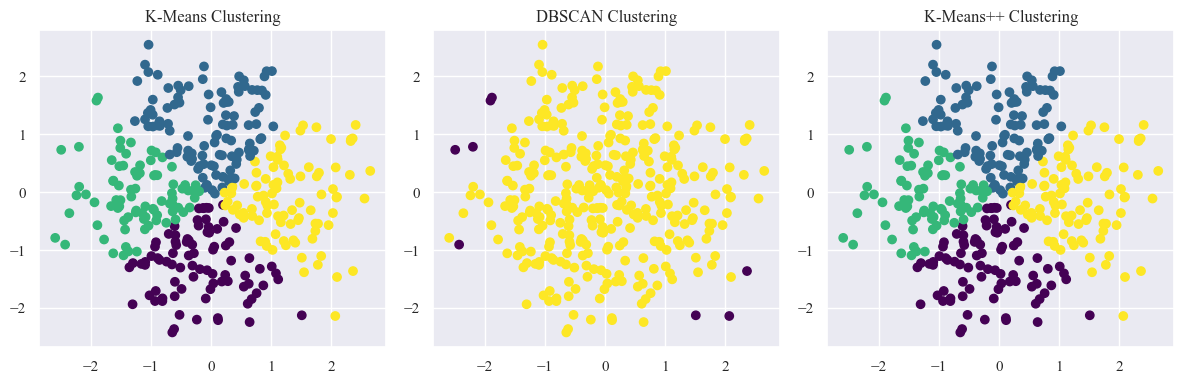

In [290]:
start_time_kmeans = time.time()

kmeans = KMeans(n_clusters=4, n_init=10,random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca_scaled_data)
kmeans_score = silhouette_score(X_pca_scaled_data, kmeans_labels)
end_time_kmeans = time.time()
# DBSCAN
dbscan = DBSCAN(eps=0.5,min_samples=5)  # Replace with your optimal parameters
dbscan_labels = dbscan.fit_predict(X_pca_scaled_data)
dbscan_score = silhouette_score(X_pca_scaled_data, dbscan_labels)

# K-Means++
start_time_pp = time.time()
kmeans_plus = KMeans(n_clusters=4, n_init=10,init='k-means++', random_state=42)
kmeans_plus_labels = kmeans_plus.fit_predict(X_pca_scaled_data)
kmeans_plus_score = silhouette_score(X_pca_scaled_data, kmeans_plus_labels)
end_time_pp = time.time()

# Print silhouette scores
print(f"Silhouette Score - K-Means: {kmeans_score:.2f}")
print(f"Silhouette Score - DBSCAN: {dbscan_score:.2f}")
print(f"Silhouette Score - K-Means++: {kmeans_plus_score:.2f}")
print(f"Convergence Time for Regular K-Means: {end_time_kmeans - start_time_kmeans:.4f} seconds")
print(f"Convergence Time for K-Means++: {end_time_pp - start_time_pp:.4f} seconds")

# Visualize clusters
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca_scaled_data[:, 0], X_pca_scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X_pca_scaled_data[:, 0], X_pca_scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X_pca_scaled_data[:, 0], X_pca_scaled_data[:, 1], c=kmeans_plus_labels, cmap='viridis')
plt.title('K-Means++ Clustering')

plt.tight_layout()
plt.show()



### **Conclusion and Recommendations**

*Customer Segments in the Electronics Section:*

- *Segment 1 - Young Trendsetters (Age: 17.9-42.8)*
  - *Product Preferences:* Primarily favor "Low" preference products.
  - *Purchase Behavior:* Likely prioritize affordability, trendiness, or entry-level features.
  
- *Segment 2 - Middle-Aged Balancers (Age: 42.8-55.2)*
  - *Product Preferences:* Balanced distribution with a slight inclination towards "Medium" and "High" preference products.
  - *Purchase Behavior:* Consider factors like quality, functionality, and brand reputation significantly.

- *Segment 3 - Senior Enthusiasts (Age: 55.2-80.0)*
  - *Product Preferences:* Strong inclination towards "High" preference products.
  - *Purchase Behavior:* Prioritize reliability, durability, advanced features, or specific needs related to accessibility or health.

*Differentiating Factors & Purchase Behavior Patterns:*

- *Income Influence:* Higher-income groups consistently spend more on electronics.
- *Brand Affinity:* Brand C remains the most popular, especially during winter and fall.
- *Seasonal Variation:* Winter and fall months observe peak sales, particularly for "High" preference products.

*Strategies for Customer Retention & Growth:*

1. *Personalized Recommendations:* Leverage age-specific preferences for targeted product recommendations and marketing strategies.
2. *Seasonal Campaigns:* Create promotional offers aligned with seasonal trends, especially during peak purchase months.
3. *Brand Partnerships:* Strengthen collaborations with Brand C, focusing on its popularity during peak sales seasons.

*Clustering Analysis Applications:*

- *Targeted Marketing:* Tailor marketing campaigns based on identified segments for maximum impact and relevance.
- *Loyalty Programs:* Design loyalty programs catering to each segment's preferences for increased engagement.

*Personalized Product Recommendations:*
  * Leverage cluster insights to recommend products tailored to each customer segment's preferences.
  * Utilize collaborative filtering or content-based recommendation systems trained on purchase history and product attributes.
  * Offer Tech Enthusiasts new arrivals and trendy gadgets.
  * Suggest functional and reliable options for Balanced Buyers.
  * Recommend premium and advanced features for Quality Seekers.
  * Highlight seasonal deals and gift ideas for Seasonal Shoppers.

By implementing these recommendations and continuously analyzing customer behavior, the electronics section can enhance customer retention, drive sales growth, and optimize its marketing and product offerings for each segment.


---